In [1]:
import scipy
import pylab
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import sklearn.metrics
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

plt.style.use('seaborn-v0_8-white')
#plt.style.use('seaborn-white')
#Reset default params
sns.set()

In [2]:
print(matplotlib.get_backend())
print('-'*41)

module://matplotlib_inline.backend_inline
-----------------------------------------


- disponibilité intérieure = production + variation de stock + importations - exportations
- nourriture = disponibilité intérieure - aliments pour animaux - semences - pertes - traitement - autres utilisations

In [3]:
df_population = pd.read_csv('./data/Population.csv', encoding='utf_8', encoding_errors='strict')

In [4]:
df_population.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,27722.276,X,International reliable sources,NaN
1,OA,Annual population,2,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,37171.921,X,International reliable sources,NaN
2,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,3002.678,X,International reliable sources,NaN
3,OA,Annual population,3,Albania,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2018,2018,1000 persons,2882.740,X,International reliable sources,NaN
4,OA,Annual population,4,Algeria,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2008,2008,1000 persons,34730.608,X,International reliable sources,NaN


In [5]:
len(df_population['Area Code (FAO)'].sort_values(ascending=True).unique())

248

In [6]:
liste_pays = [1,   2,   3,   4,   7,   8,   9,  10,  11,  12,  14,  16,  19, 20,  21,  23,  25,  27,  28,  29,  32,  33,  35,  37,  38,  39,
              40,  44,  45,  46,  48,  49,  50,  52,  53,  54,  55,  56,  57, 58,  59,  60,  63,  66,  67,  68,  70,  72,  73,  74,  75,  79,
              80,  81,  83,  84,  86,  89,  90,  91,  93,  95,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113,
              114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 129, 130, 131, 132, 133, 134, 136, 137, 138, 141, 143, 144, 146, 147,
              149, 150, 153, 154, 155, 156, 157, 158, 159, 162, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 181, 183, 184, 185, 188,
              189, 191, 193, 194, 195, 196, 197, 198, 199, 202, 203, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 220, 221, 222, 223, 225,
              226, 229, 230, 231, 233, 234, 235, 236, 237, 238, 244, 249, 250, 251, 255, 256, 272, 273, 276, 351]

In [7]:
filt = (df_population['Area Code (FAO)'].isin(liste_pays))
# boolean_index =

In [8]:
df_population = df_population.loc[filt]

In [9]:
len(df_population['Area Code (FAO)'].sort_values(ascending=True).unique())

176

In [10]:
lst = df_population['Area'].unique()
list(filter(lambda x: 'China' in x, lst))

['China']

In [11]:
df_population = df_population.loc[:, ['Area Code (FAO)', 'Area', 'Year', 'Value']]
df_population.head()

,Area Code (FAO),Area,Year,Value
0,2,Afghanistan,2008,27722.276
1,2,Afghanistan,2018,37171.921
2,3,Albania,2008,3002.678
3,3,Albania,2018,2882.740
4,4,Algeria,2008,34730.608


In [12]:
df_population.shape

(352, 4)

In [13]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 0 to 495
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area Code (FAO)  352 non-null    int64  
 1   Area             352 non-null    object 
 2   Year             352 non-null    int64  
 3   Value            351 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.8+ KB


In [14]:
df_population.describe(include='all')

,Area Code (FAO),Area,Year,Value
count,352.000000,352,352.000000,3.510000e+02
unique,NaN,176,NaN,NaN
top,NaN,Afghanistan,NaN,NaN
freq,NaN,2,NaN,NaN
mean,128.852273,NaN,2013.000000,4.070728e+04
std,75.086585,NaN,5.007117,1.481070e+05
min,1.000000,NaN,2008.000000,4.818500e+01
25%,66.750000,NaN,2008.000000,2.703486e+03
50%,123.500000,NaN,2013.000000,9.452617e+03
75%,191.500000,NaN,2018.000000,2.824073e+04


In [15]:
df_population.isnull().sum()

Area Code (FAO)    0
Area               0
Year               0
Value              1
dtype: int64

In [16]:
df_population.loc[df_population['Value'].isnull()]

,Area Code (FAO),Area,Year,Value
420,276,Sudan,2008,NaN


In [17]:
df_population.fillna(value=38126, inplace=True)
df_population.loc[df_population['Area']=='Sudan']

,Area Code (FAO),Area,Year,Value
420,276,Sudan,2008,38126.000
421,276,Sudan,2018,41801.533


In [18]:
df_population

,Area Code (FAO),Area,Year,Value
0,2,Afghanistan,2008,27722.276
1,2,Afghanistan,2018,37171.921
2,3,Albania,2008,3002.678
3,3,Albania,2018,2882.740
4,4,Algeria,2008,34730.608
...,...,...,...,...
489,249,Yemen,2018,28498.683
492,251,Zambia,2008,12848.530
493,251,Zambia,2018,17351.708
494,181,Zimbabwe,2008,12379.549


In [19]:
filt = (df_population['Year'] == 2018)
df_population_2018 = df_population[filt].copy()

In [20]:
filt = (df_population['Year'] == 2008)
df_population_2008 = df_population[filt].copy()

In [21]:
df_population_2018.head()

,Area Code (FAO),Area,Year,Value
1,2,Afghanistan,2018,37171.921
3,3,Albania,2018,2882.740
5,4,Algeria,2018,42228.408
11,7,Angola,2018,30809.787
15,8,Antigua and Barbuda,2018,96.286


In [22]:
df_population_2008.head()

,Area Code (FAO),Area,Year,Value
0,2,Afghanistan,2008,27722.276
2,3,Albania,2008,3002.678
4,4,Algeria,2008,34730.608
10,7,Angola,2008,21695.634
14,8,Antigua and Barbuda,2008,85.397


In [23]:
df_population = pd.merge(df_population_2018, df_population_2008, on=['Area Code (FAO)', 'Area'])
df_population.head()

,Area Code (FAO),Area,Year_x,Value_x,Year_y,Value_y
0,2,Afghanistan,2018,37171.921,2008,27722.276
1,3,Albania,2018,2882.740,2008,3002.678
2,4,Algeria,2018,42228.408,2008,34730.608
3,7,Angola,2018,30809.787,2008,21695.634
4,8,Antigua and Barbuda,2018,96.286,2008,85.397


In [24]:
df_population['Diff'] = df_population['Value_x'] - df_population['Value_y']
df_population.head()

,Area Code (FAO),Area,Year_x,Value_x,Year_y,Value_y,Diff
0,2,Afghanistan,2018,37171.921,2008,27722.276,9449.645
1,3,Albania,2018,2882.740,2008,3002.678,-119.938
2,4,Algeria,2018,42228.408,2008,34730.608,7497.800
3,7,Angola,2018,30809.787,2008,21695.634,9114.153
4,8,Antigua and Barbuda,2018,96.286,2008,85.397,10.889


In [25]:
def calcul(row):
    '''
    calcul de la différence de population en pourcentage :
    
    - dans le cas où la différence est positive
    - dans le cas où la différence est négative
    
    Args:
    Returns:
    
    '''
    c = row['Diff']
    if c < 0:
        cprime = -np.round((np.absolute(c)/row['Value_y'])*100, 2)
        return cprime
    else:
        cprime = np.round((c/row['Value_x'])*100, 2)
        return cprime

In [26]:
df_population['Percent'] = df_population.apply(calcul, axis='columns')

In [27]:
df_population.head()

,Area Code (FAO),Area,Year_x,Value_x,Year_y,Value_y,Diff,Percent
0,2,Afghanistan,2018,37171.921,2008,27722.276,9449.645,25.42
1,3,Albania,2018,2882.740,2008,3002.678,-119.938,-3.99
2,4,Algeria,2018,42228.408,2008,34730.608,7497.800,17.76
3,7,Angola,2018,30809.787,2008,21695.634,9114.153,29.58
4,8,Antigua and Barbuda,2018,96.286,2008,85.397,10.889,11.31


In [28]:
df_population = df_population.loc[:, ['Area Code (FAO)', 'Area', 'Percent']]
df_population.head()

,Area Code (FAO),Area,Percent
0,2,Afghanistan,25.42
1,3,Albania,-3.99
2,4,Algeria,17.76
3,7,Angola,29.58
4,8,Antigua and Barbuda,11.31


In [29]:
col_names = ['Area Code', 'Area', 'Var pop']

In [30]:
df_population.columns = col_names
df_population.head()

,Area Code,Area,Var pop
0,2,Afghanistan,25.42
1,3,Albania,-3.99
2,4,Algeria,17.76
3,7,Angola,29.58
4,8,Antigua and Barbuda,11.31


In [31]:
df_population.duplicated().any()

False

In [32]:
df_population.isnull().sum()

Area Code    0
Area         0
Var pop      0
dtype: int64

In [33]:
df_population.describe(include='all')

,Area Code,Area,Var pop
count,176.000000,176,176.000000
unique,NaN,176,NaN
top,NaN,Afghanistan,NaN
freq,NaN,1,NaN
mean,128.852273,NaN,12.055511
std,75.193775,NaN,10.511190
min,1.000000,NaN,-18.000000
25%,66.750000,NaN,4.480000
50%,123.500000,NaN,11.120000
75%,191.500000,NaN,20.120000


In [34]:
#df_population['Area'].to_list()

In [35]:
df_pib = pd.read_csv('./data/Macro indicators.csv', encoding='utf_8', encoding_errors='strict')

In [36]:
df_pib.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,2,Afghanistan,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,483.885875,X,International reliable sources,NaN
1,MK,Macro Indicators,3,Albania,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,5254.384798,X,International reliable sources,NaN
2,MK,Macro Indicators,4,Algeria,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,4153.957220,X,International reliable sources,NaN
3,MK,Macro Indicators,6,Andorra,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,41794.398572,X,International reliable sources,NaN
4,MK,Macro Indicators,7,Angola,6119,Value US$ per capita,22008,Gross Domestic Product,2018,2018,US$,3289.643374,X,International reliable sources,NaN


In [37]:
len(df_pib['Area Code (FAO)'].sort_values(ascending=True).unique())

219

In [38]:
filt = (df_pib['Area Code (FAO)'].isin(liste_pays))

In [39]:
df_pib = df_pib.loc[filt]

In [40]:
len(df_pib['Area Code (FAO)'].sort_values(ascending=True).unique())

176

In [41]:
lst = df_pib['Area'].unique()
list(filter(lambda x: 'China' in x, lst))

['China']

In [42]:
df_pib = df_pib.loc[:, ['Area Code (FAO)', 'Area', 'Value']]
df_pib.head()

,Area Code (FAO),Area,Value
0,2,Afghanistan,483.885875
1,3,Albania,5254.384798
2,4,Algeria,4153.957220
4,7,Angola,3289.643374
6,8,Antigua and Barbuda,16672.744240


In [43]:
f = (lambda x: np.round(x, 2))

In [44]:
df_pib['Value'] = df_pib['Value'].apply(f)

In [45]:
col_names = ['Area Code', 'Area', 'GDP (USD per capita)']

In [46]:
df_pib.columns = col_names
df_pib.head()

,Area Code,Area,GDP (USD per capita)
0,2,Afghanistan,483.89
1,3,Albania,5254.38
2,4,Algeria,4153.96
4,7,Angola,3289.64
6,8,Antigua and Barbuda,16672.74


In [47]:
#df_pib['Area'].to_list()

In [48]:
df = pd.merge(df_population, df_pib, on=['Area Code', 'Area'])
df

,Area Code,Area,Var pop,GDP (USD per capita)
0,2,Afghanistan,25.42,483.89
1,3,Albania,-3.99,5254.38
2,4,Algeria,17.76,4153.96
3,7,Angola,29.58,3289.64
4,8,Antigua and Barbuda,11.31,16672.74
...,...,...,...,...
171,236,Venezuela (Bolivarian Republic of),4.33,7061.61
172,237,Viet Nam,9.74,2566.45
173,249,Yemen,23.18,803.65
174,251,Zambia,25.95,1556.34


In [49]:
col_names = ['Area Code', 'Area', 'Var pop (%)', 'Pib (usd/capita)']

In [50]:
df.columns = col_names
df.head()

,Area Code,Area,Var pop (%),Pib (usd/capita)
0,2,Afghanistan,25.42,483.89
1,3,Albania,-3.99,5254.38
2,4,Algeria,17.76,4153.96
3,7,Angola,29.58,3289.64
4,8,Antigua and Barbuda,11.31,16672.74


In [51]:
df.duplicated().any()

False

In [52]:
df.isnull().sum()

Area Code           0
Area                0
Var pop (%)         0
Pib (usd/capita)    0
dtype: int64

In [53]:
df.describe(include='all')

,Area Code,Area,Var pop (%),Pib (usd/capita)
count,176.000000,176,176.000000,176.000000
unique,NaN,176,NaN,NaN
top,NaN,Afghanistan,NaN,NaN
freq,NaN,1,NaN,NaN
mean,128.852273,NaN,12.055511,13821.590909
std,75.193775,NaN,10.511190,19543.539188
min,1.000000,NaN,-18.000000,275.580000
25%,66.750000,NaN,4.480000,1705.560000
50%,123.500000,NaN,11.120000,5910.350000
75%,191.500000,NaN,20.120000,16562.122500


In [54]:
df_food = pd.read_csv('./data/Food balances.csv', encoding='utf_8', encoding_errors='strict')

In [55]:
df_food.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),2,Afghanistan,5511,Production,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
1,FBS,Food Balances (2010-),2,Afghanistan,5611,Import Quantity,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
2,FBS,Food Balances (2010-),2,Afghanistan,5911,Export Quantity,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
3,FBS,Food Balances (2010-),2,Afghanistan,5301,Domestic supply quantity,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
4,FBS,Food Balances (2010-),2,Afghanistan,664,Food supply (kcal/capita/day),2901,Grand Total,2018,2018,kcal/capita/day,2270.0,Fc,Calculated data


In [56]:
len(df_food['Area Code (FAO)'].sort_values(ascending=True).unique())

187

In [57]:
filt = (df_food['Area Code (FAO)'].isin(liste_pays))

In [58]:
df_food = df_food.loc[filt]

In [59]:
len(df_food['Area Code (FAO)'].sort_values(ascending=True).unique())

176

In [60]:
lst = df_food['Area'].unique()
list(filter(lambda x: 'China' in x, lst))

['China']

In [61]:
#list(df_food['Area'].unique())

In [62]:
filt = (df_food['Area'] == 'France')
df_food.loc[filt][:5]

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
1116,FBS,Food Balances (2010-),68,France,5511,Production,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
1117,FBS,Food Balances (2010-),68,France,5611,Import Quantity,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
1118,FBS,Food Balances (2010-),68,France,5911,Export Quantity,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
1119,FBS,Food Balances (2010-),68,France,5301,Domestic supply quantity,2901,Grand Total,2018,2018,NaN,NaN,NaN,NaN
1120,FBS,Food Balances (2010-),68,France,664,Food supply (kcal/capita/day),2901,Grand Total,2018,2018,kcal/capita/day,3477.0,Fc,Calculated data


In [63]:
df_food = df_food.loc[:, ['Area Code (FAO)', 'Area', 'Element', 'Item', 'Unit', 'Value']]
df_food.head()

,Area Code (FAO),Area,Element,Item,Unit,Value
0,2,Afghanistan,Production,Grand Total,NaN,NaN
1,2,Afghanistan,Import Quantity,Grand Total,NaN,NaN
2,2,Afghanistan,Export Quantity,Grand Total,NaN,NaN
3,2,Afghanistan,Domestic supply quantity,Grand Total,NaN,NaN
4,2,Afghanistan,Food supply (kcal/capita/day),Grand Total,kcal/capita/day,2270.0


In [64]:
df_food = df_food.pivot(index=['Area Code (FAO)', 'Area'], columns=['Element', 'Item', 'Unit'], values='Value')
df_food

,Element,Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Export Quantity,Production
,Item,Grand Total,Grand Total,Grand Total,Grand Total,Grand Total,Grand Total,Animal Products,Animal Products,Animal Products,Animal Products,Animal Products,Animal Products,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat
,Unit,NaN,NaN,NaN,NaN,kcal/capita/day,g/capita/day,NaN,NaN,NaN,NaN,kcal/capita/day,g/capita/day,1000 tonnes,1000 tonnes,1000 tonnes,1000 tonnes,kcal/capita/day,g/capita/day,NaN,NaN
Area Code (FAO),Area,,,,,,,,,,,,,,,,,,,,
1,Armenia,NaN,NaN,NaN,NaN,3074.0,97.38,NaN,NaN,NaN,NaN,832.0,47.75,12.0,33.0,0.0,45.0,50.0,5.01,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,2270.0,57.62,NaN,NaN,NaN,NaN,189.0,10.69,29.0,25.0,0.0,53.0,5.0,0.51,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,3296.0,112.89,NaN,NaN,NaN,NaN,1001.0,60.86,16.0,12.0,NaN,27.0,50.0,3.52,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,3382.0,90.29,NaN,NaN,NaN,NaN,382.0,24.30,286.0,0.0,0.0,286.0,23.0,2.08,NaN,NaN
7,Angola,NaN,NaN,NaN,NaN,2451.0,53.80,NaN,NaN,NaN,NaN,219.0,16.67,41.0,335.0,0.0,376.0,41.0,4.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,Luxembourg,NaN,NaN,NaN,NaN,3477.0,108.37,NaN,NaN,NaN,NaN,1179.0,66.37,0.0,12.0,1.0,11.0,72.0,7.52,NaN,NaN


In [65]:
df_food = df_food.reset_index()
df_food

Element,Area Code (FAO),Area,Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Export Quantity,Production
Item,,,Grand Total,Grand Total,Grand Total,Grand Total,Grand Total,Grand Total,Animal Products,Animal Products,Animal Products,Animal Products,Animal Products,Animal Products,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat
Unit,,,NaN,NaN,NaN,NaN,kcal/capita/day,g/capita/day,NaN,NaN,NaN,NaN,kcal/capita/day,g/capita/day,1000 tonnes,1000 tonnes,1000 tonnes,1000 tonnes,kcal/capita/day,g/capita/day,NaN,NaN
0,1,Armenia,NaN,NaN,NaN,NaN,3074.0,97.38,NaN,NaN,NaN,NaN,832.0,47.75,12.0,33.0,0.0,45.0,50.0,5.01,NaN,NaN
1,2,Afghanistan,NaN,NaN,NaN,NaN,2270.0,57.62,NaN,NaN,NaN,NaN,189.0,10.69,29.0,25.0,0.0,53.0,5.0,0.51,NaN,NaN
2,3,Albania,NaN,NaN,NaN,NaN,3296.0,112.89,NaN,NaN,NaN,NaN,1001.0,60.86,16.0,12.0,NaN,27.0,50.0,3.52,NaN,NaN
3,4,Algeria,NaN,NaN,NaN,NaN,3382.0,90.29,NaN,NaN,NaN,NaN,382.0,24.30,286.0,0.0,0.0,286.0,23.0,2.08,NaN,NaN
4,7,Angola,NaN,NaN,NaN,NaN,2451.0,53.80,NaN,NaN,NaN,NaN,219.0,16.67,41.0,335.0,0.0,376.0,41.0,4.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,256,Luxembourg,NaN,NaN,NaN,NaN,3477.0,108.37,NaN,NaN,NaN,NaN,1179.0,66.37,0.0,12.0,1.0,11.0,72.0,7.52,NaN,NaN
172,272,Serbia,NaN,NaN,NaN,NaN,2829.0,84.03,NaN,NaN,NaN,NaN,785.0,41.71,96.0,17.0,9.0,103.0,40.0,4.02,NaN,NaN


In [66]:
df_food.isnull().sum()

Element                                 Item             Unit           
Area Code (FAO)                                                               0
Area                                                                          0
Production                              Grand Total      NaN                176
Import Quantity                         Grand Total      NaN                176
Export Quantity                         Grand Total      NaN                176
Domestic supply quantity                Grand Total      NaN                176
Food supply (kcal/capita/day)           Grand Total      kcal/capita/day      0
Protein supply quantity (g/capita/day)  Grand Total      g/capita/day         0
Production                              Animal Products  NaN                176
Import Quantity                         Animal Products  NaN                176
Export Quantity                         Animal Products  NaN                176
Domestic supply quantity                Animal 

In [67]:
df_food = df_food.dropna(axis='columns', how='all', subset=None)
df_food.isna().sum()

Element                                 Item             Unit           
Area Code (FAO)                                                              0
Area                                                                         0
Food supply (kcal/capita/day)           Grand Total      kcal/capita/day     0
Protein supply quantity (g/capita/day)  Grand Total      g/capita/day        0
Food supply (kcal/capita/day)           Animal Products  kcal/capita/day     0
Protein supply quantity (g/capita/day)  Animal Products  g/capita/day        0
Production                              Poultry Meat     1000 tonnes         2
Import Quantity                         Poultry Meat     1000 tonnes         0
Export Quantity                         Poultry Meat     1000 tonnes        40
Domestic supply quantity                Poultry Meat     1000 tonnes         0
Food supply (kcal/capita/day)           Poultry Meat     kcal/capita/day     0
Protein supply quantity (g/capita/day)  Poultry Meat     g

In [68]:
df_food

Element,Area Code (FAO),Area,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Food supply (kcal/capita/day),Protein supply quantity (g/capita/day),Production,Import Quantity,Export Quantity,Domestic supply quantity,Food supply (kcal/capita/day),Protein supply quantity (g/capita/day)
Item,,,Grand Total,Grand Total,Animal Products,Animal Products,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat,Poultry Meat
Unit,,,kcal/capita/day,g/capita/day,kcal/capita/day,g/capita/day,1000 tonnes,1000 tonnes,1000 tonnes,1000 tonnes,kcal/capita/day,g/capita/day
0,1,Armenia,3074.0,97.38,832.0,47.75,12.0,33.0,0.0,45.0,50.0,5.01
1,2,Afghanistan,2270.0,57.62,189.0,10.69,29.0,25.0,0.0,53.0,5.0,0.51
2,3,Albania,3296.0,112.89,1001.0,60.86,16.0,12.0,NaN,27.0,50.0,3.52
3,4,Algeria,3382.0,90.29,382.0,24.30,286.0,0.0,0.0,286.0,23.0,2.08
4,7,Angola,2451.0,53.80,219.0,16.67,41.0,335.0,0.0,376.0,41.0,4.16
...,...,...,...,...,...,...,...,...,...,...,...,...
171,256,Luxembourg,3477.0,108.37,1179.0,66.37,0.0,12.0,1.0,11.0,72.0,7.52
172,272,Serbia,2829.0,84.03,785.0,41.71,96.0,17.0,9.0,103.0,40.0,4.02


In [69]:
df_food.columns

MultiIndex([(                       'Area Code (FAO)',                '', ...),
            (                                  'Area',                '', ...),
            (         'Food supply (kcal/capita/day)',     'Grand Total', ...),
            ('Protein supply quantity (g/capita/day)',     'Grand Total', ...),
            (         'Food supply (kcal/capita/day)', 'Animal Products', ...),
            ('Protein supply quantity (g/capita/day)', 'Animal Products', ...),
            (                            'Production',    'Poultry Meat', ...),
            (                       'Import Quantity',    'Poultry Meat', ...),
            (                       'Export Quantity',    'Poultry Meat', ...),
            (              'Domestic supply quantity',    'Poultry Meat', ...),
            (         'Food supply (kcal/capita/day)',    'Poultry Meat', ...),
            ('Protein supply quantity (g/capita/day)',    'Poultry Meat', ...)],
           names=['Element', 'Item', 'U

In [70]:
col_names = ['Area Code', 'Area', 'Food supply total (kcal/capita/day)', 'Protein supply total (g/capita/day)', 'Food supply animal (kcal/capita/day)',
             'Protein supply animal (g/capita/day)', 'Production poultry (*1000 tonnes)', 'Import poultry (*1000 tonnes)', 'Export poultry (*1000 tonnes)',
             'Domestic supply poultry (*1000 tonnes)', 'Food supply poultry (kcal/capita/day)', 'Protein supply poultry (g/capita/day)']

In [71]:
df_food.columns = col_names
df_food

,Area Code,Area,Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day)
0,1,Armenia,3074.0,97.38,832.0,47.75,12.0,33.0,0.0,45.0,50.0,5.01
1,2,Afghanistan,2270.0,57.62,189.0,10.69,29.0,25.0,0.0,53.0,5.0,0.51
2,3,Albania,3296.0,112.89,1001.0,60.86,16.0,12.0,NaN,27.0,50.0,3.52
3,4,Algeria,3382.0,90.29,382.0,24.30,286.0,0.0,0.0,286.0,23.0,2.08
4,7,Angola,2451.0,53.80,219.0,16.67,41.0,335.0,0.0,376.0,41.0,4.16
...,...,...,...,...,...,...,...,...,...,...,...,...
171,256,Luxembourg,3477.0,108.37,1179.0,66.37,0.0,12.0,1.0,11.0,72.0,7.52
172,272,Serbia,2829.0,84.03,785.0,41.71,96.0,17.0,9.0,103.0,40.0,4.02
173,273,Montenegro,3501.0,113.49,1229.0,68.90,4.0,9.0,0.0,10.0,58.0,6.11
174,276,Sudan,2599.0,75.13,360.0,20.36,70.0,1.0,NaN,68.0,5.0,0.55


In [72]:
df_food = df_food.sort_values(by='Area')

In [73]:
list1 = df_food['Area'].to_list()
list2 = df['Area'].to_list()

In [74]:
list1 == list2

True

In [75]:
list_difference = [element for element in list1 if element not in list2]
print(list_difference)

[]


In [76]:
df = pd.merge(df_food, df, on=['Area Code', 'Area'])
df

,Area Code,Area,Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
0,2,Afghanistan,2270.0,57.62,189.0,10.69,29.0,25.0,0.0,53.0,5.0,0.51,25.42,483.89
1,3,Albania,3296.0,112.89,1001.0,60.86,16.0,12.0,NaN,27.0,50.0,3.52,-3.99,5254.38
2,4,Algeria,3382.0,90.29,382.0,24.30,286.0,0.0,0.0,286.0,23.0,2.08,17.76,4153.96
3,7,Angola,2451.0,53.80,219.0,16.67,41.0,335.0,0.0,376.0,41.0,4.16,29.58,3289.64
4,8,Antigua and Barbuda,2470.0,80.96,736.0,51.57,0.0,7.0,0.0,6.0,249.0,18.98,11.31,16672.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,236,Venezuela (Bolivarian Republic of),2225.0,50.49,309.0,24.01,448.0,3.0,0.0,451.0,54.0,5.56,4.33,7061.61
172,237,Viet Nam,2916.0,86.34,604.0,33.03,930.0,162.0,22.0,1070.0,42.0,3.68,9.74,2566.45
173,249,Yemen,2009.0,51.65,133.0,10.35,183.0,97.0,NaN,299.0,37.0,3.74,23.18,803.65
174,251,Zambia,2254.0,58.07,165.0,14.22,50.0,11.0,1.0,59.0,11.0,1.15,25.95,1556.34


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Area Code                               176 non-null    int64  
 1   Area                                    176 non-null    object 
 2   Food supply total (kcal/capita/day)     176 non-null    float64
 3   Protein supply total (g/capita/day)     176 non-null    float64
 4   Food supply animal (kcal/capita/day)    176 non-null    float64
 5   Protein supply animal (g/capita/day)    176 non-null    float64
 6   Production poultry (*1000 tonnes)       174 non-null    float64
 7   Import poultry (*1000 tonnes)           176 non-null    float64
 8   Export poultry (*1000 tonnes)           136 non-null    float64
 9   Domestic supply poultry (*1000 tonnes)  176 non-null    float64
 10  Food supply poultry (kcal/capita/day)   176 non-null    float6

In [78]:
df.duplicated().any()

False

In [79]:
df.isnull().sum()

Area Code                                  0
Area                                       0
Food supply total (kcal/capita/day)        0
Protein supply total (g/capita/day)        0
Food supply animal (kcal/capita/day)       0
Protein supply animal (g/capita/day)       0
Production poultry (*1000 tonnes)          2
Import poultry (*1000 tonnes)              0
Export poultry (*1000 tonnes)             40
Domestic supply poultry (*1000 tonnes)     0
Food supply poultry (kcal/capita/day)      0
Protein supply poultry (g/capita/day)      0
Var pop (%)                                0
Pib (usd/capita)                           0
dtype: int64

In [80]:
df.describe(include='all')

,Area Code,Area,Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
count,176.000000,176,176.000000,176.000000,176.000000,176.000000,174.000000,176.000000,136.00000,176.000000,176.000000,176.000000,176.000000,176.000000
unique,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,128.852273,NaN,2873.329545,81.249318,559.607955,36.889659,737.827586,88.653409,133.75000,688.107955,76.369318,7.320682,12.055511,13821.590909
std,75.193775,NaN,452.351462,20.753302,342.051675,20.298487,2597.462324,205.064922,511.93088,2300.020336,63.840829,5.897662,10.511190,19543.539188
min,1.000000,NaN,1775.000000,26.050000,29.000000,2.610000,0.000000,0.000000,0.00000,2.000000,1.000000,0.140000,-18.000000,275.580000
25%,66.750000,NaN,2582.500000,65.502500,262.000000,19.272500,11.250000,3.000000,0.00000,29.000000,22.750000,2.505000,4.480000,1705.560000
50%,123.500000,NaN,2872.500000,81.645000,540.000000,35.815000,74.000000,17.000000,2.00000,111.500000,64.500000,6.435000,11.120000,5910.350000
75%,191.500000,NaN,3265.750000,97.000000,826.250000,51.517500,344.500000,82.750000,33.50000,330.250000,107.000000,10.645000,20.120000,16562.122500


#### Recherche des lignes qui présentent des valeurs Nan

In [81]:
filt = df.isna().any(axis=1)
df.loc[filt][:3]

,Area Code,Area,Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
1,3,Albania,3296.0,112.89,1001.0,60.86,16.0,12.0,NaN,27.0,50.0,3.52,-3.99,5254.38
15,23,Belize,2731.0,71.82,605.0,31.32,20.0,0.0,NaN,20.0,111.0,8.32,19.90,4884.74
22,233,Burkina Faso,2748.0,80.62,150.0,10.90,42.0,0.0,NaN,43.0,7.0,0.73,25.63,813.10


In [82]:
#df.loc[:, 'Export poultry (*1000 tonnes)'] =  df.loc[:, 'Export poultry (*1000 tonnes)'].fillna(0, inplace=False)

In [83]:
df.fillna(0, inplace = True)
filt = df.isna().any(axis=1)
df.loc[filt]

,Area Code,Area,Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)


In [84]:
df.describe(include='all')

,Area Code,Area,Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
count,176.000000,176,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
unique,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,128.852273,NaN,2873.329545,81.249318,559.607955,36.889659,729.443182,88.653409,103.352273,688.107955,76.369318,7.320682,12.055511,13821.590909
std,75.193775,NaN,452.351462,20.753302,342.051675,20.298487,2583.767601,205.064922,453.133977,2300.020336,63.840829,5.897662,10.511190,19543.539188
min,1.000000,NaN,1775.000000,26.050000,29.000000,2.610000,0.000000,0.000000,0.000000,2.000000,1.000000,0.140000,-18.000000,275.580000
25%,66.750000,NaN,2582.500000,65.502500,262.000000,19.272500,10.750000,3.000000,0.000000,29.000000,22.750000,2.505000,4.480000,1705.560000
50%,123.500000,NaN,2872.500000,81.645000,540.000000,35.815000,72.000000,17.000000,0.000000,111.500000,64.500000,6.435000,11.120000,5910.350000
75%,191.500000,NaN,3265.750000,97.000000,826.250000,51.517500,335.500000,82.750000,15.750000,330.250000,107.000000,10.645000,20.120000,16562.122500


In [85]:
df.insert(2, 'Protein supply animal / Protein supply total (%)', np.round((df['Protein supply animal (g/capita/day)'] / df['Protein supply total (g/capita/day)'])*100, 2))

In [86]:
df.insert(3, 'Protein supply poultry / Protein supply animal (%)', np.round((df['Protein supply poultry (g/capita/day)'] / df['Protein supply animal (g/capita/day)'])*100, 2))

In [87]:
df.insert(4, 'Ratio export poultry (%)', np.round(((df['Export poultry (*1000 tonnes)'] / (df['Production poultry (*1000 tonnes)'] + df['Import poultry (*1000 tonnes)']))*100), 2))

In [88]:
df.insert(5, 'Ratio import poultry (%)', np.round(((df['Import poultry (*1000 tonnes)'] / (df['Production poultry (*1000 tonnes)'] + df['Import poultry (*1000 tonnes)']))*100), 2))

In [89]:
df[:3]

,Area Code,Area,Protein supply animal / Protein supply total (%),Protein supply poultry / Protein supply animal (%),Ratio export poultry (%),Ratio import poultry (%),Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
0,2,Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,189.0,10.69,29.0,25.0,0.0,53.0,5.0,0.51,25.42,483.89
1,3,Albania,53.91,5.78,0.0,42.86,3296.0,112.89,1001.0,60.86,16.0,12.0,0.0,27.0,50.0,3.52,-3.99,5254.38
2,4,Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,382.0,24.30,286.0,0.0,0.0,286.0,23.0,2.08,17.76,4153.96


In [90]:
df.describe(include='all')

,Area Code,Area,Protein supply animal / Protein supply total (%),Protein supply poultry / Protein supply animal (%),Ratio export poultry (%),Ratio import poultry (%),Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Food supply animal (kcal/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Domestic supply poultry (*1000 tonnes),Food supply poultry (kcal/capita/day),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
count,176.000000,176,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
unique,NaN,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,128.852273,NaN,42.514773,19.040795,6.370057,35.881875,2873.329545,81.249318,559.607955,36.889659,729.443182,88.653409,103.352273,688.107955,76.369318,7.320682,12.055511,13821.590909
std,75.193775,NaN,15.908289,11.588516,13.417261,35.020930,452.351462,20.753302,342.051675,20.298487,2583.767601,205.064922,453.133977,2300.020336,63.840829,5.897662,10.511190,19543.539188
min,1.000000,NaN,6.410000,0.520000,0.000000,0.000000,1775.000000,26.050000,29.000000,2.610000,0.000000,0.000000,0.000000,2.000000,1.000000,0.140000,-18.000000,275.580000
25%,66.750000,NaN,28.927500,10.445000,0.000000,3.895000,2582.500000,65.502500,262.000000,19.272500,10.750000,3.000000,0.000000,29.000000,22.750000,2.505000,4.480000,1705.560000
50%,123.500000,NaN,43.975000,17.335000,0.000000,22.850000,2872.500000,81.645000,540.000000,35.815000,72.000000,17.000000,0.000000,111.500000,64.500000,6.435000,11.120000,5910.350000
75%,191.500000,NaN,56.185000,26.520000,7.312500,67.610000,3265.750000,97.000000,826.250000,51.517500,335.500000,82.750000,15.750000,330.250000,107.000000,10.645000,20.120000,16562.122500


In [91]:
df.columns

Index(['Area Code', 'Area', 'Protein supply animal / Protein supply total (%)',
       'Protein supply poultry / Protein supply animal (%)',
       'Ratio export poultry (%)', 'Ratio import poultry (%)',
       'Food supply total (kcal/capita/day)',
       'Protein supply total (g/capita/day)',
       'Food supply animal (kcal/capita/day)',
       'Protein supply animal (g/capita/day)',
       'Production poultry (*1000 tonnes)', 'Import poultry (*1000 tonnes)',
       'Export poultry (*1000 tonnes)',
       'Domestic supply poultry (*1000 tonnes)',
       'Food supply poultry (kcal/capita/day)',
       'Protein supply poultry (g/capita/day)', 'Var pop (%)',
       'Pib (usd/capita)'],
      dtype='object')

In [92]:
col_names = df.columns[2:]

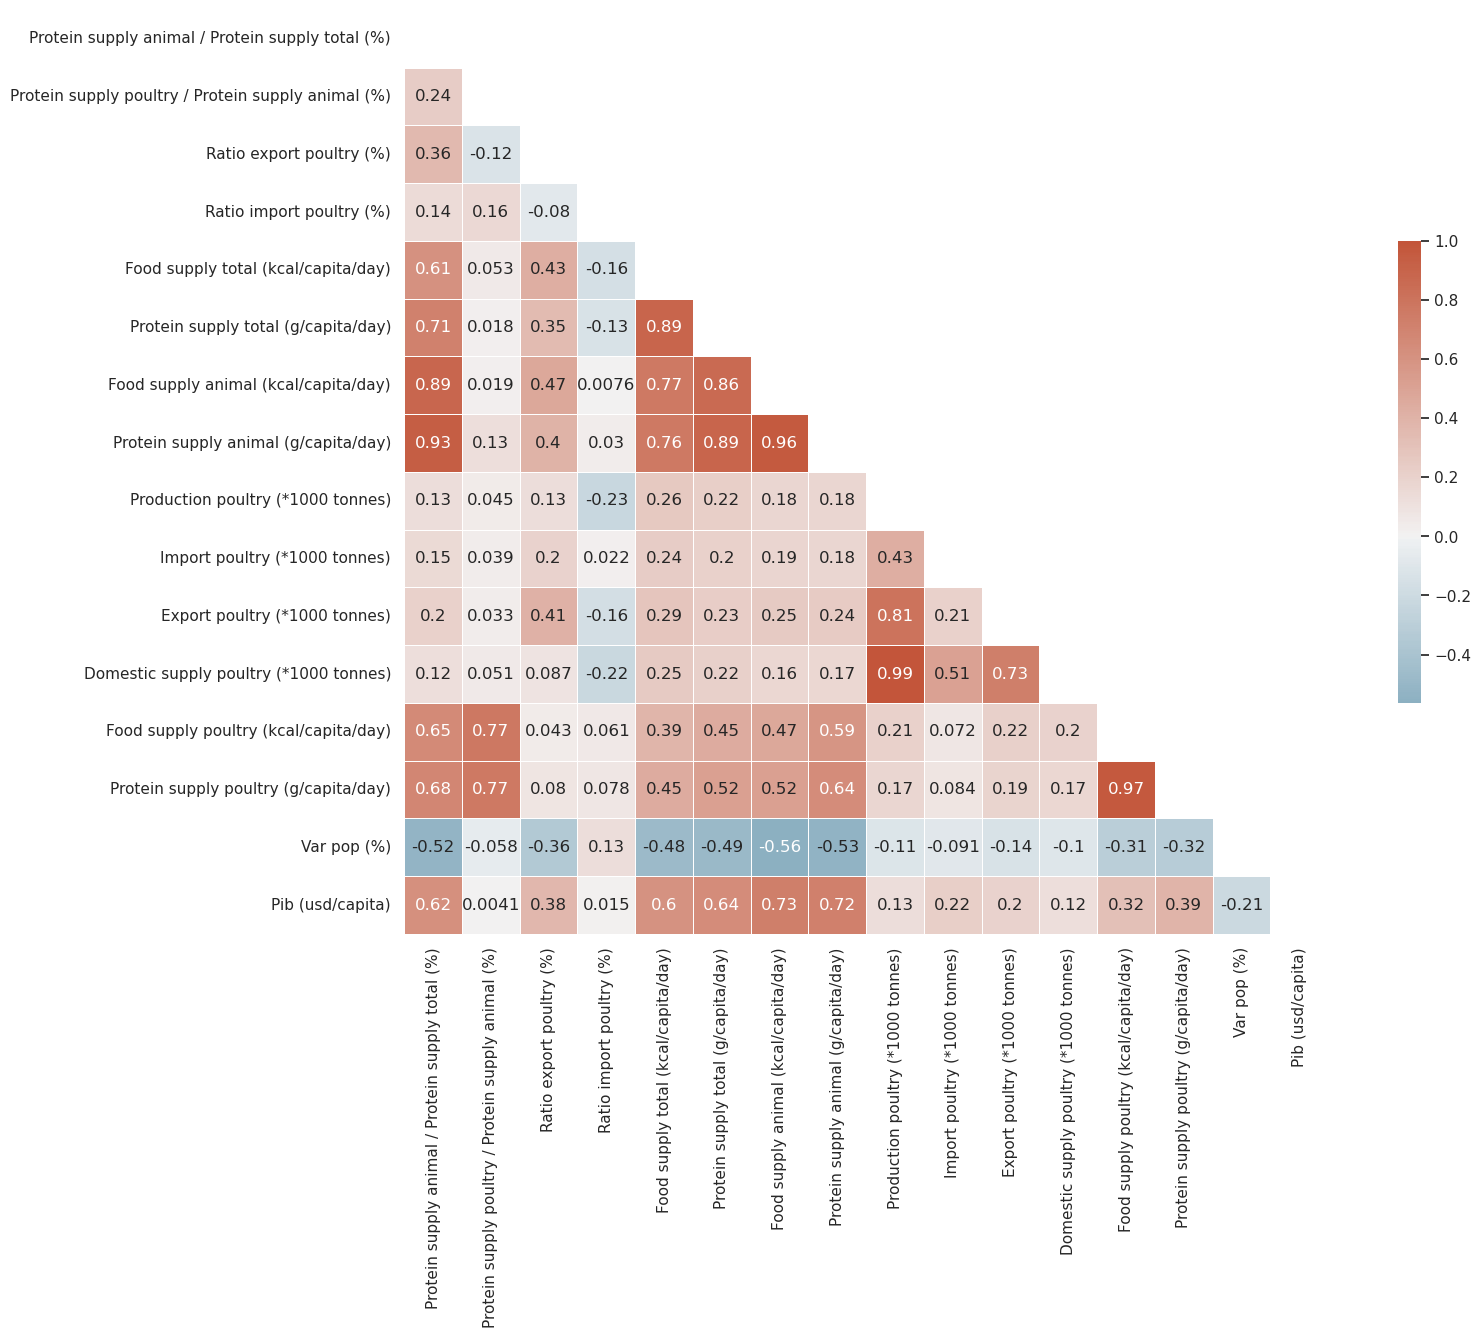

In [93]:
sns.set_theme(style='white')

# Compute the correlation matrix
corr = df[col_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

### Après études des corrélations, pour alléger le dataset, les 3 variables suivantes ne sont pas conservées :
- Food supply animal (kcal/capita/day)
- Food supply poultry (kcal/capita/day)
- Domestic supply poultry (*1000 tonnes)

### Je conserve les 3 variables qui leur sont fortement corrélées : 
- Protein supply animal (g/capita/day)
- Protein supply poultry (g/capita/day)
- Production poultry (*1000 tonnes)

In [94]:
df = df.drop(columns=['Food supply animal (kcal/capita/day)', 'Food supply poultry (kcal/capita/day)', 'Domestic supply poultry (*1000 tonnes)'])
df[:3]

,Area Code,Area,Protein supply animal / Protein supply total (%),Protein supply poultry / Protein supply animal (%),Ratio export poultry (%),Ratio import poultry (%),Food supply total (kcal/capita/day),Protein supply total (g/capita/day),Protein supply animal (g/capita/day),Production poultry (*1000 tonnes),Import poultry (*1000 tonnes),Export poultry (*1000 tonnes),Protein supply poultry (g/capita/day),Var pop (%),Pib (usd/capita)
0,2,Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
1,3,Albania,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
2,4,Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96


In [95]:
# df = df.drop(columns=['Export poultry (*1000 tonnes)'])
# df[:3]

In [96]:
# df = df.drop(columns=['Protein supply animal (g/capita/day)', 'Protein supply poultry (g/capita/day)'])
# df[:3]

In [97]:
col_names = df.columns[2:]

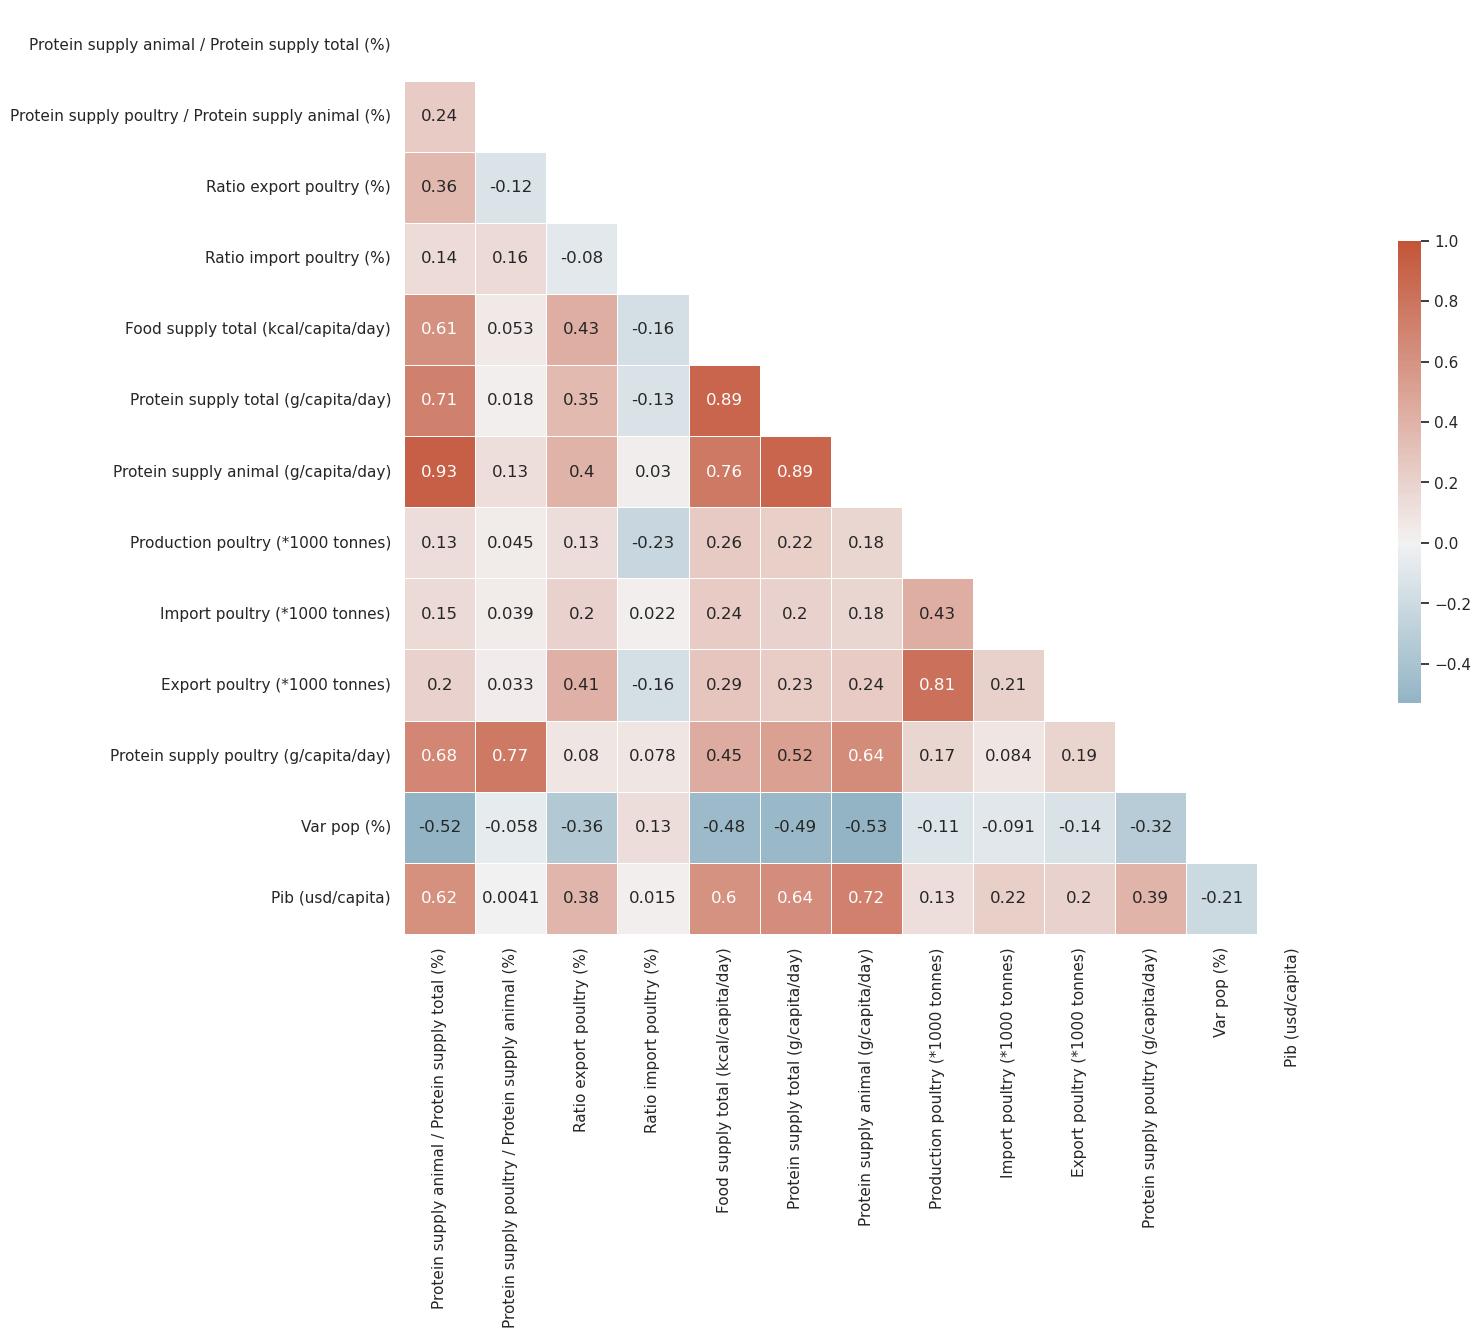

In [98]:
# Compute the correlation matrix
corr = df[col_names].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

#plt.savefig('Matrice des corrélations.png', transparent=True);

In [99]:
df.columns

Index(['Area Code', 'Area', 'Protein supply animal / Protein supply total (%)',
       'Protein supply poultry / Protein supply animal (%)',
       'Ratio export poultry (%)', 'Ratio import poultry (%)',
       'Food supply total (kcal/capita/day)',
       'Protein supply total (g/capita/day)',
       'Protein supply animal (g/capita/day)',
       'Production poultry (*1000 tonnes)', 'Import poultry (*1000 tonnes)',
       'Export poultry (*1000 tonnes)',
       'Protein supply poultry (g/capita/day)', 'Var pop (%)',
       'Pib (usd/capita)'],
      dtype='object')

In [100]:
col_names = ['Area Code', 'Area', 'Protein animal/ Protein total',
             'Protein poultry/ Protein animal',
             'Ratio export poultry', 'Ratio import poultry',
             'Food total',
             'Protein total',
             'Protein animal',
             'Production poultry', 'Import poultry',
             'Export poultry',
             'Protein poultry', 'Var pop',
             'Pib']

In [101]:
df.columns = col_names
df[:3]

,Area Code,Area,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
0,2,Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
1,3,Albania,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
2,4,Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96


In [102]:
#sns.pairplot(df[col_names[2:]], diag_kind='kde', corner=True, height=3);

In [103]:
df = df.drop(columns='Area Code')
df[:3]

,Area,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
0,Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
1,Albania,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
2,Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96


In [104]:
df.set_index('Area', inplace=True)
df[:3]

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,
Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96


In [105]:
print(*df.columns, sep = '\n')

Protein animal/ Protein total
Protein poultry/ Protein animal
Ratio export poultry
Ratio import poultry
Food total
Protein total
Protein animal
Production poultry
Import poultry
Export poultry
Protein poultry
Var pop
Pib


In [106]:
df[:5]

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,
Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96
Angola,30.99,24.96,0.0,89.10,2451.0,53.80,16.67,41.0,335.0,0.0,4.16,29.58,3289.64
Antigua and Barbuda,63.70,36.80,0.0,100.00,2470.0,80.96,51.57,0.0,7.0,0.0,18.98,11.31,16672.74


In [107]:
len(df)

176

In [108]:
print(*df.index, sep=', ')

Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belgium, Belize, Benin, Bolivia (Plurinational State of), Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cabo Verde, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Congo, Costa Rica, Cote d'Ivoire, Croatia, Cuba, Cyprus, Czechia, Democratic People's Republic of Korea, Democratic Republic of the Congo, Denmark, Djibouti, Dominica, Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Eswatini, Ethiopia, Fiji, Finland, France, French Polynesia, Gabon, Gambia, Georgia, Germany, Ghana, Greece, Grenada, Guatemala, Guinea, Guinea-Bissau, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iran (Islamic Republic of), Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kiribati, Kuwait, Kyrgyzstan, Lao People's Democratic Republic, Latvia

In [109]:
# filt = df.index.isin(['Brazil', 'China', 'United States of America'])
# df = df.loc[~filt, :]

In [110]:
print('Classement des 30 plus gros importateurs de viande de poulet')
df.loc[:, 'Import poultry'].sort_values(ascending=False)[:30]

Classement des 30 plus gros importateurs de viande de poulet


Area
China                                                   1567.0
Japan                                                   1089.0
Mexico                                                   983.0
Germany                                                  871.0
United Kingdom of Great Britain and Northern Ireland     802.0
Saudi Arabia                                             640.0
United Arab Emirates                                     609.0
Netherlands                                              585.0
France                                                   533.0
South Africa                                             515.0
Angola                                                   335.0
Belgium                                                  303.0
Cuba                                                     284.0
Philippines                                              282.0
Russian Federation                                       225.0
Iraq                                              

In [111]:
print('Classement des 30 plus petits importateurs de viande de poulet')
df.loc[:, 'Import poultry'].sort_values(ascending=True)[:30]

Classement des 30 plus petits importateurs de viande de poulet


Area
Ethiopia                                 0.0
Mali                                     0.0
Malawi                                   0.0
Burundi                                  0.0
Burkina Faso                             0.0
Madagascar                               0.0
Rwanda                                   0.0
Bolivia (Plurinational State of)         0.0
Nepal                                    0.0
Senegal                                  0.0
Israel                                   0.0
Democratic People's Republic of Korea    0.0
Belize                                   0.0
Indonesia                                0.0
Sri Lanka                                0.0
India                                    0.0
Ecuador                                  0.0
Uganda                                   0.0
Algeria                                  0.0
Bangladesh                               0.0
Chad                                     1.0
New Zealand                              1.0
Guyan

In [112]:
print('Classement des 30 plus gros exportateurs de viande de poulet')
df.loc[:, 'Export poultry'].sort_values(ascending=False)[:30]

Classement des 30 plus gros exportateurs de viande de poulet


Area
Brazil                                                  4012.0
United States of America                                3776.0
Netherlands                                             1423.0
China                                                   1209.0
Poland                                                  1150.0
Thailand                                                 870.0
Germany                                                  640.0
Belgium                                                  639.0
Turkey                                                   489.0
France                                                   474.0
United Kingdom of Great Britain and Northern Ireland     383.0
Ukraine                                                  331.0
Spain                                                    242.0
Hungary                                                  232.0
Russian Federation                                       193.0
Italy                                             

In [113]:
print('Classement des 30 plus gros producteurs de viande de poulet')
df.loc[:, 'Production poultry'].sort_values(ascending=False)[:30]

Classement des 30 plus gros producteurs de viande de poulet


Area
United States of America                                22298.0
China                                                   20728.0
Brazil                                                  14095.0
Russian Federation                                       4543.0
India                                                    4101.0
Indonesia                                                3454.0
Mexico                                                   3377.0
Poland                                                   2509.0
Japan                                                    2250.0
Iran (Islamic Republic of)                               2243.0
Turkey                                                   2229.0
Argentina                                                2115.0
United Kingdom of Great Britain and Northern Ireland     1939.0
France                                                   1785.0
South Africa                                             1762.0
Myanmar                            

In [114]:
print('Classement des 30 plus gros Pib par habitant')
df.loc[:, 'Pib'].sort_values(ascending=False)[:30]

Classement des 30 plus gros Pib par habitant


Area
Luxembourg                                              117369.54
Switzerland                                              86315.13
Norway                                                   81335.65
Ireland                                                  80137.06
Iceland                                                  76437.78
United States of America                                 63014.66
Denmark                                                  62043.06
Australia                                                58596.83
Sweden                                                   55703.52
Netherlands                                              53579.54
Austria                                                  51183.78
Finland                                                  49967.00
Germany                                                  47684.76
Belgium                                                  47354.64
Canada                                                   46444.40
Israe

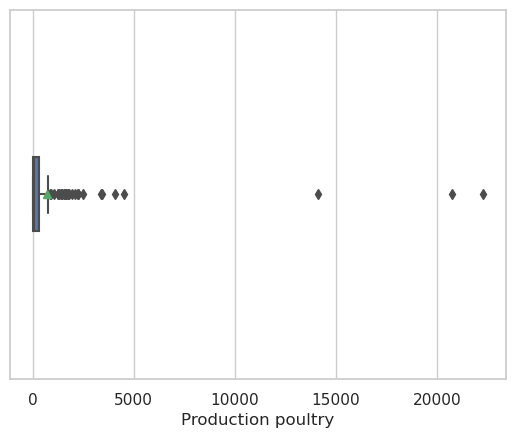

In [115]:
sns.set_theme(style='whitegrid')

ax = sns.boxplot(x=df['Production poultry'], showmeans=True, width=.2)

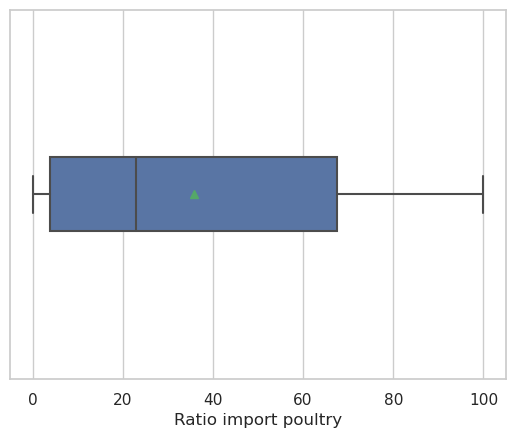

In [116]:
ax = sns.boxplot(x=df['Ratio import poultry'], showmeans=True, width=.2)

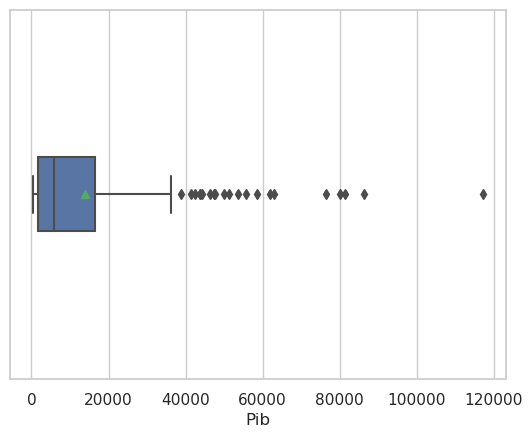

In [117]:
ax = sns.boxplot(x=df['Pib'], showmeans=True, width=.2)
sns.set()

### Choix du nombre de clusters et du nombre de composantes de l'ACP

In [118]:
n_cluster = 6
n_comp = 4

### Clustering kmeans

In [119]:
# transformer les données en array numpy
X = df.values
X[:3]

array([[ 1.85500e+01,  4.77000e+00,  0.00000e+00,  4.63000e+01,
         2.27000e+03,  5.76200e+01,  1.06900e+01,  2.90000e+01,
         2.50000e+01,  0.00000e+00,  5.10000e-01,  2.54200e+01,
         4.83890e+02],
       [ 5.39100e+01,  5.78000e+00,  0.00000e+00,  4.28600e+01,
         3.29600e+03,  1.12890e+02,  6.08600e+01,  1.60000e+01,
         1.20000e+01,  0.00000e+00,  3.52000e+00, -3.99000e+00,
         5.25438e+03],
       [ 2.69100e+01,  8.56000e+00,  0.00000e+00,  0.00000e+00,
         3.38200e+03,  9.02900e+01,  2.43000e+01,  2.86000e+02,
         0.00000e+00,  0.00000e+00,  2.08000e+00,  1.77600e+01,
         4.15396e+03]])

In [120]:
# Centrage et Réduction
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [121]:
df_scaled = pd.DataFrame(X_scaled, index = df.index, columns = df.columns)
df_scaled[:3]

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,
Afghanistan,-1.510731,-1.234974,-0.47612,0.298332,-1.337568,-1.141830,-1.294402,-0.271867,-0.311292,-0.228734,-1.158105,1.275081,-0.684408
Albania,0.718351,-1.147570,-0.47612,0.199824,0.937051,1.528959,1.184262,-0.276913,-0.374867,-0.228734,-0.646277,-1.530872,-0.439616
Algeria,-0.983719,-0.906993,-0.47612,-1.027507,1.127711,0.436869,-0.621996,-0.172116,-0.433552,-0.228734,-0.891138,0.544255,-0.496083


In [122]:
km = KMeans(n_clusters=n_cluster, n_init=10).fit(X_scaled)

In [123]:
k_clusters = km.labels_+1

print('k_clusters:\n')
print(*k_clusters, sep = ', ')
print('\n')

df_clst = pd.DataFrame()
df_clst['index'] = df.index
df_clst['label'] = k_clusters

# print them
for i in np.unique(k_clusters):
    elements = df_clst[df_clst['label']==i]['index'].tolist()  
    size = len(elements)
    print(f'\n Cluster {i}: N = {size}  {elements}')

k_clusters:

5, 2, 5, 1, 4, 2, 2, 3, 3, 2, 4, 5, 4, 2, 3, 5, 1, 4, 2, 1, 6, 2, 5, 5, 1, 5, 5, 3, 5, 5, 2, 6, 4, 1, 1, 2, 5, 2, 2, 2, 2, 5, 1, 3, 1, 4, 4, 5, 2, 2, 3, 5, 5, 4, 3, 3, 4, 4, 1, 2, 3, 1, 2, 4, 1, 1, 1, 4, 1, 5, 3, 3, 5, 5, 4, 1, 3, 4, 3, 4, 2, 1, 2, 5, 2, 4, 1, 5, 2, 5, 1, 1, 4, 3, 3, 5, 5, 4, 1, 5, 2, 1, 4, 2, 2, 2, 2, 5, 2, 1, 5, 3, 4, 3, 5, 5, 5, 2, 3, 1, 5, 4, 1, 5, 4, 5, 3, 3, 2, 2, 2, 2, 5, 4, 4, 4, 4, 1, 4, 5, 2, 4, 1, 2, 3, 1, 4, 3, 5, 5, 4, 3, 3, 2, 1, 2, 1, 5, 4, 2, 2, 2, 5, 2, 4, 3, 5, 6, 2, 2, 1, 5, 2, 1, 5, 5



 Cluster 1: N = 31  ['Angola', 'Benin', 'Botswana', 'Cabo Verde', 'Comoros', 'Congo', 'Democratic Republic of the Congo', 'Djibouti', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Jordan', 'Kyrgyzstan', 'Lesotho', 'Liberia', 'Maldives', 'Mauritania', 'Namibia', 'Oman', 'Papua New Guinea', 'Sao Tome and Principe', 'Sierra Leone', 'Solomon Islands', 'Tajikistan', 'Timor-Leste', 'Vanuatu', 'Yemen']

 Cluster 2: N = 43  ['Alba

In [124]:
centroids = km.cluster_centers_

In [125]:
km.predict(centroids)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [126]:
df_scaled.columns

Index(['Protein animal/ Protein total', 'Protein poultry/ Protein animal',
       'Ratio export poultry', 'Ratio import poultry', 'Food total',
       'Protein total', 'Protein animal', 'Production poultry',
       'Import poultry', 'Export poultry', 'Protein poultry', 'Var pop',
       'Pib'],
      dtype='object')

In [127]:
df_scaled[:3]

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,
Afghanistan,-1.510731,-1.234974,-0.47612,0.298332,-1.337568,-1.141830,-1.294402,-0.271867,-0.311292,-0.228734,-1.158105,1.275081,-0.684408
Albania,0.718351,-1.147570,-0.47612,0.199824,0.937051,1.528959,1.184262,-0.276913,-0.374867,-0.228734,-0.646277,-1.530872,-0.439616
Algeria,-0.983719,-0.906993,-0.47612,-1.027507,1.127711,0.436869,-0.621996,-0.172116,-0.433552,-0.228734,-0.891138,0.544255,-0.496083


In [128]:
df_kmeans = df_scaled.copy()
df_kmeans.insert(0, 'Clusters', k_clusters)
df_kmeans[:5]

,Clusters,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,,
Afghanistan,5,-1.510731,-1.234974,-0.47612,0.298332,-1.337568,-1.141830,-1.294402,-0.271867,-0.311292,-0.228734,-1.158105,1.275081,-0.684408
Albania,2,0.718351,-1.147570,-0.47612,0.199824,0.937051,1.528959,1.184262,-0.276913,-0.374867,-0.228734,-0.646277,-1.530872,-0.439616
Algeria,5,-0.983719,-0.906993,-0.47612,-1.027507,1.127711,0.436869,-0.621996,-0.172116,-0.433552,-0.228734,-0.891138,0.544255,-0.496083
Angola,1,-0.726518,0.512239,-0.47612,1.523945,-0.936295,-1.326422,-0.998959,-0.267210,1.204738,-0.228734,-0.537450,1.671979,-0.540434
Antigua and Barbuda,4,1.335509,1.536855,-0.47612,1.836075,-0.894173,-0.013981,0.725287,-0.283123,-0.399319,-0.228734,1.982579,-0.071128,0.146303


In [129]:
df_kmeans_med = df_kmeans.groupby('Clusters').median()
df_kmeans_med.reset_index(inplace=True)
df_kmeans_med.insert(0, 'Med/Cent', 'M')
df_kmeans_med

,Med/Cent,Clusters,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
0,M,1,-0.768754,-0.063242,-0.476120,1.263359,-0.909691,-0.846579,-0.972280,-0.280406,-0.306401,-0.228734,-0.653079,0.905851,-0.608240
1,M,2,0.449172,-0.135069,-0.298231,-0.377187,0.602287,0.528199,0.380932,-0.236159,-0.281949,-0.211029,-0.088538,-0.848704,-0.336004
2,M,3,1.165302,-0.445742,0.568046,-0.311611,1.194220,1.268984,1.437217,-0.193076,-0.037428,-0.045043,0.270252,-0.728490,1.720708
3,M,4,0.587544,1.418298,-0.476120,0.435927,0.090165,0.106584,0.301142,-0.265851,-0.350415,-0.228734,1.299859,-0.151748,-0.153062
4,M,5,-1.142895,-1.007810,-0.476120,-0.998871,-0.634786,-0.840055,-1.082207,-0.254401,-0.428662,-0.228734,-1.060331,0.838589,-0.631071
5,M,6,0.931425,0.709547,0.782560,-1.011185,0.954787,1.125466,0.919944,7.762159,0.192421,8.128117,1.407836,-0.461347,-0.197702


In [130]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(df_scaled.to_numpy())
scaled_projected = pca.transform(df_scaled.to_numpy())
median_projected = pca.transform(df_kmeans_med.drop(columns=['Med/Cent', 'Clusters']).to_numpy())

In [131]:
# Append the principle components for each entry to the dataframe

df_scaled_projected = df_scaled.copy()

for i in range(0, n_comp):
    df_scaled_projected['F' + str(i + 1)] = scaled_projected[:, i]

df_scaled_projected

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib,F1,F2,F3,F4
Area,,,,,,,,,,,,,,,,,
Afghanistan,-1.510731,-1.234974,-0.476120,0.298332,-1.337568,-1.141830,-1.294402,-0.271867,-0.311292,-0.228734,-1.158105,1.275081,-0.684408,-3.302157,0.752683,-0.418742,0.622085
Albania,0.718351,-1.147570,-0.476120,0.199824,0.937051,1.528959,1.184262,-0.276913,-0.374867,-0.228734,-0.646277,-1.530872,-0.439616,1.406233,-0.223009,-1.798583,-0.518261
Algeria,-0.983719,-0.906993,-0.476120,-1.027507,1.127711,0.436869,-0.621996,-0.172116,-0.433552,-0.228734,-0.891138,0.544255,-0.496083,-0.898085,0.876183,-1.130208,-0.900198
Angola,-0.726518,0.512239,-0.476120,1.523945,-0.936295,-1.326422,-0.998959,-0.267210,1.204738,-0.228734,-0.537450,1.671979,-0.540434,-2.337742,-0.232973,1.253145,2.092901
Antigua and Barbuda,1.335509,1.536855,-0.476120,1.836075,-0.894173,-0.013981,0.725287,-0.283123,-0.399319,-0.228734,1.982579,-0.071128,0.146303,0.969131,-2.661180,1.765026,0.701133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.317419,0.356470,-0.476120,-1.008321,-1.437332,-1.486370,-0.636324,-0.109238,-0.418881,-0.228734,-0.299391,-0.737077,-0.346880,-1.427031,-0.103589,0.398661,-1.082956
Viet Nam,-0.268219,-0.683723,-0.325886,-0.602551,0.094599,0.245995,-0.190688,0.077843,0.358695,-0.180045,-0.619071,-0.220919,-0.577544,-0.455359,0.702234,-0.581141,-0.361269
Yemen,-1.416802,1.479740,-0.476120,-0.035562,-1.916199,-1.430315,-1.311200,-0.212094,0.040818,-0.228734,-0.608868,1.061367,-0.668000,-3.052585,-0.182054,1.591314,0.071043


In [132]:
centroids_projected = pca.transform(centroids)

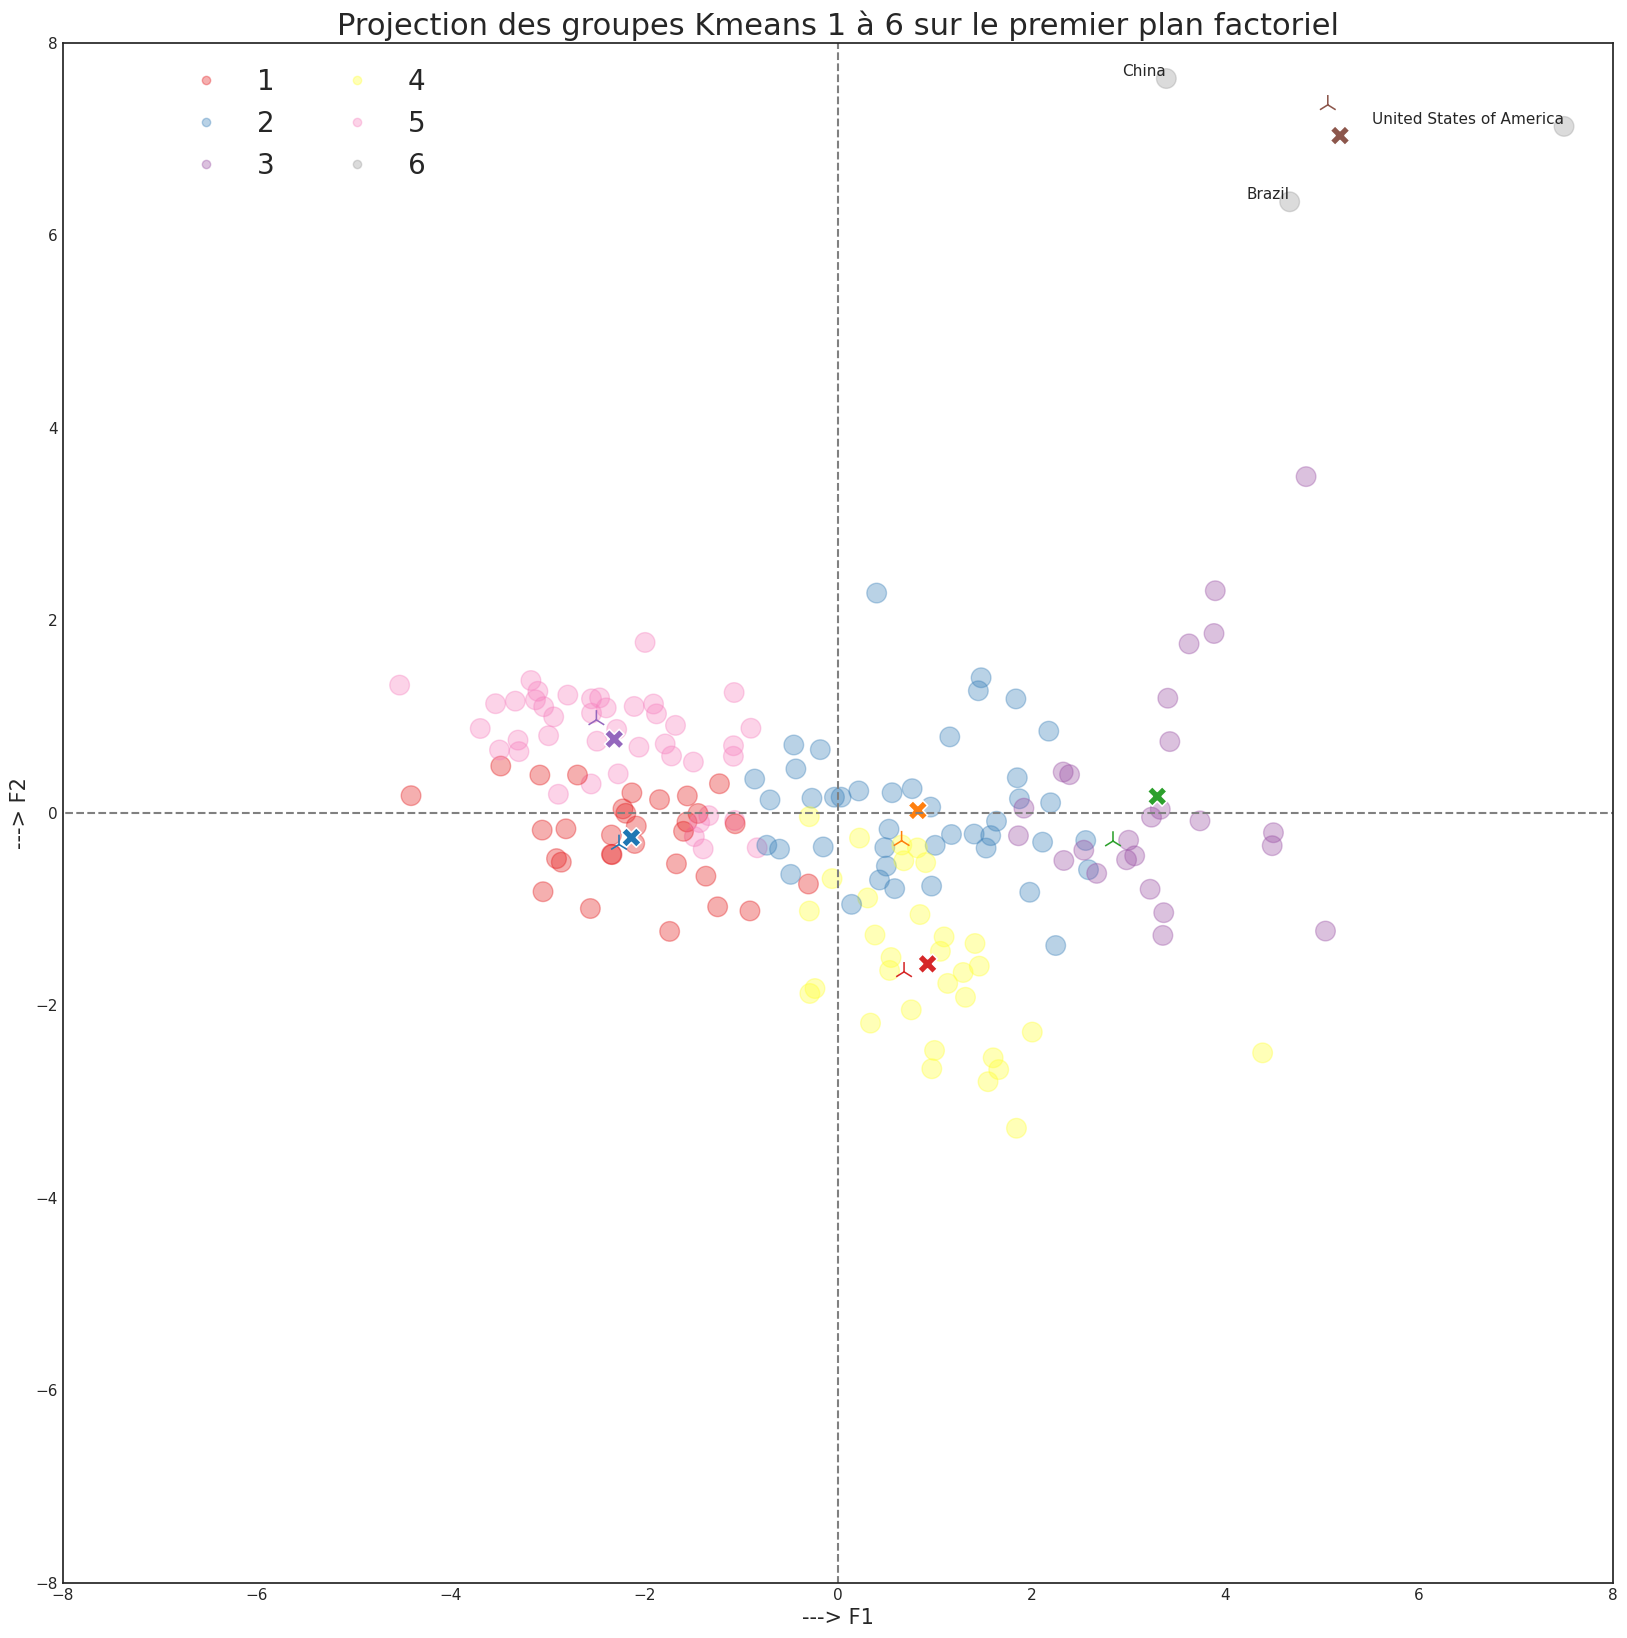

In [133]:
fig = plt.figure(figsize=(20, 20))
plt.style.use('seaborn-v0_8-white')

# affichage des observations
#obs = plt.scatter(X_projected[:, f1], X_projected[:, f2], c=clusters, cmap='jet', s=200, alpha=.35)

# affichage des observations
obs = plt.scatter(df_scaled_projected.loc[:, 'F1'], df_scaled_projected.loc[:, 'F2'], c=k_clusters, cmap='Set1', s=200, alpha=.35)

# affichage des labels des points
for i, (x, y) in enumerate(zip(df_scaled_projected.loc[:, 'F1'], df_scaled_projected.loc[:, 'F2'])):
    if pd.DataFrame(df_scaled_projected).index[i] in (['Brazil', 'China', 'United States of America']):
        plt.text(x, y, df_scaled_projected.index[i], fontsize='11', ha='right', va='bottom')
        
# Affichage des positions des centres de classes
sns.scatterplot(x=centroids_projected[:, 0], y=centroids_projected[:, 1], marker='X', palette='tab10', hue=range(6), s=200, legend=False, alpha=1)

# Affichage des positions des médianes des classes
sns.scatterplot(x=median_projected[:, 0], y=median_projected[:, 1], marker='2', palette='tab10', hue=range(6), s=200, legend=False, alpha=1)
        
# affichage des lignes horizontales et verticales
plt.plot([-10, 10], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-10, 10], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel(f'---> F1', fontsize='15')
plt.ylabel(f'---> F2', fontsize='15')

# limites du graphique       
plt.xlim([-8, 8])
plt.ylim([-8, 8])

plt.legend(*obs.legend_elements(), bbox_to_anchor=(.25, 1), ncol=2, fontsize=20)
plt.title(f'Projection des groupes Kmeans 1 à 6 sur le premier plan factoriel', fontsize=22)

#plt.savefig('Projection.png', transparent=True)
plt.show();

In [134]:
# fig, ax = plt.subplots(figsize=(12, 8))

# sns.histplot(df_clst, x='label', ax=ax, bins=6)

# ax.set_title('Taille des clusters kmeans', fontsize=15)
# ax.set_xlabel('Cluster id', fontsize=15)
# ax.set_ylabel('Valeurs', fontsize=15)
# ax.tick_params(axis='x', labelsize=13, labelrotation=0)
# ax.tick_params(axis='y', labelsize=13)

# plt.show();

In [135]:
centroids_projected = decomposition.PCA(n_components=n_comp).fit_transform(centroids)

In [136]:
df_center = pd.DataFrame(centroids, columns = df.columns)
df_center

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
0,-0.681943,-0.025723,-0.316531,1.179142,-0.909191,-0.959809,-0.815362,-0.270778,-0.123405,-0.223879,-0.658071,0.947770,-0.553856
1,0.344687,-0.254311,0.119724,-0.107212,0.576199,0.524670,0.374739,-0.038652,0.075051,-0.086012,-0.075449,-0.785247,-0.163769
2,1.145886,-0.351934,1.334915,-0.275943,1.251596,1.340231,1.460102,-0.015387,0.429117,0.307999,0.429411,-0.686510,1.817521
3,0.612878,1.502673,-0.408127,0.375505,0.068134,0.149259,0.364551,-0.140847,-0.036206,-0.210545,1.474630,-0.105594,0.057801
4,-1.049266,-0.675976,-0.428836,-0.814204,-0.812567,-0.823948,-0.999794,-0.151748,-0.380340,-0.227364,-0.891746,0.628577,-0.598935
5,0.709526,0.278874,0.787543,-0.954772,1.355321,1.172339,0.995205,7.107115,2.334424,6.408500,1.058115,-0.491242,0.693075


In [137]:
df_center_projected = pd.DataFrame(centroids_projected, columns = ['F' + str(i+1) for i in range(n_comp)])
df_center_projected

,F1,F2,F3,F4
0,-2.791398,-1.881534,0.283362,1.029123
1,-1.382996,0.813556,-0.409882,-0.476958
2,-0.226358,3.102949,-0.958346,0.429727
3,-1.572143,0.894564,2.028477,-0.354144
4,-2.621680,-2.064852,-1.008016,-0.637361
5,8.594575,-0.864684,0.064406,0.009612


In [138]:
df_centroids = pd.concat([df_center_projected, df_center], axis=1)
df_centroids

,F1,F2,F3,F4,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
0,-2.791398,-1.881534,0.283362,1.029123,-0.681943,-0.025723,-0.316531,1.179142,-0.909191,-0.959809,-0.815362,-0.270778,-0.123405,-0.223879,-0.658071,0.947770,-0.553856
1,-1.382996,0.813556,-0.409882,-0.476958,0.344687,-0.254311,0.119724,-0.107212,0.576199,0.524670,0.374739,-0.038652,0.075051,-0.086012,-0.075449,-0.785247,-0.163769
2,-0.226358,3.102949,-0.958346,0.429727,1.145886,-0.351934,1.334915,-0.275943,1.251596,1.340231,1.460102,-0.015387,0.429117,0.307999,0.429411,-0.686510,1.817521
3,-1.572143,0.894564,2.028477,-0.354144,0.612878,1.502673,-0.408127,0.375505,0.068134,0.149259,0.364551,-0.140847,-0.036206,-0.210545,1.474630,-0.105594,0.057801
4,-2.621680,-2.064852,-1.008016,-0.637361,-1.049266,-0.675976,-0.428836,-0.814204,-0.812567,-0.823948,-0.999794,-0.151748,-0.380340,-0.227364,-0.891746,0.628577,-0.598935
5,8.594575,-0.864684,0.064406,0.009612,0.709526,0.278874,0.787543,-0.954772,1.355321,1.172339,0.995205,7.107115,2.334424,6.408500,1.058115,-0.491242,0.693075


In [139]:
df_centroids.insert(0, 'Centroids', list(range(1, (n_cluster+1), 1)))
df_centroids

,Centroids,F1,F2,F3,F4,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
0,1,-2.791398,-1.881534,0.283362,1.029123,-0.681943,-0.025723,-0.316531,1.179142,-0.909191,-0.959809,-0.815362,-0.270778,-0.123405,-0.223879,-0.658071,0.947770,-0.553856
1,2,-1.382996,0.813556,-0.409882,-0.476958,0.344687,-0.254311,0.119724,-0.107212,0.576199,0.524670,0.374739,-0.038652,0.075051,-0.086012,-0.075449,-0.785247,-0.163769
2,3,-0.226358,3.102949,-0.958346,0.429727,1.145886,-0.351934,1.334915,-0.275943,1.251596,1.340231,1.460102,-0.015387,0.429117,0.307999,0.429411,-0.686510,1.817521
3,4,-1.572143,0.894564,2.028477,-0.354144,0.612878,1.502673,-0.408127,0.375505,0.068134,0.149259,0.364551,-0.140847,-0.036206,-0.210545,1.474630,-0.105594,0.057801
4,5,-2.621680,-2.064852,-1.008016,-0.637361,-1.049266,-0.675976,-0.428836,-0.814204,-0.812567,-0.823948,-0.999794,-0.151748,-0.380340,-0.227364,-0.891746,0.628577,-0.598935
5,6,8.594575,-0.864684,0.064406,0.009612,0.709526,0.278874,0.787543,-0.954772,1.355321,1.172339,0.995205,7.107115,2.334424,6.408500,1.058115,-0.491242,0.693075


In [140]:
df_centroids.set_index('Centroids', inplace=True)
df_centroids

,F1,F2,F3,F4,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Centroids,,,,,,,,,,,,,,,,,
1,-2.791398,-1.881534,0.283362,1.029123,-0.681943,-0.025723,-0.316531,1.179142,-0.909191,-0.959809,-0.815362,-0.270778,-0.123405,-0.223879,-0.658071,0.947770,-0.553856
2,-1.382996,0.813556,-0.409882,-0.476958,0.344687,-0.254311,0.119724,-0.107212,0.576199,0.524670,0.374739,-0.038652,0.075051,-0.086012,-0.075449,-0.785247,-0.163769
3,-0.226358,3.102949,-0.958346,0.429727,1.145886,-0.351934,1.334915,-0.275943,1.251596,1.340231,1.460102,-0.015387,0.429117,0.307999,0.429411,-0.686510,1.817521
4,-1.572143,0.894564,2.028477,-0.354144,0.612878,1.502673,-0.408127,0.375505,0.068134,0.149259,0.364551,-0.140847,-0.036206,-0.210545,1.474630,-0.105594,0.057801
5,-2.621680,-2.064852,-1.008016,-0.637361,-1.049266,-0.675976,-0.428836,-0.814204,-0.812567,-0.823948,-0.999794,-0.151748,-0.380340,-0.227364,-0.891746,0.628577,-0.598935
6,8.594575,-0.864684,0.064406,0.009612,0.709526,0.278874,0.787543,-0.954772,1.355321,1.172339,0.995205,7.107115,2.334424,6.408500,1.058115,-0.491242,0.693075


In [141]:
#df_centroids.to_csv('Centroids.csv', index=True)

## Clustering hiérarchique

In [142]:
Z = linkage(X_scaled, method='ward', optimal_ordering=True)
names = df.index

#### Affichage du dendrogramme

In [143]:
# plt.style.use('seaborn-v0_8-white')

# plt.figure(figsize=(15, 30))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('distance')
# dendrogram(Z, labels = names, orientation = 'left', leaf_font_size=11)
# plt.savefig('Dendrogramme.png', transparent=True)
# plt.show()

# plt.style.use('seaborn');

#### Coupage du dendrogramme en 6 clusters

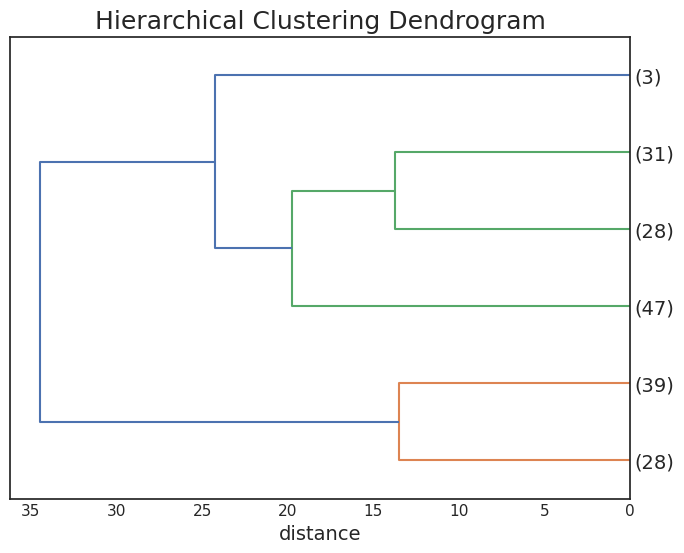

In [144]:
plt.figure(figsize=(8, 6))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('distance', fontsize=14)
dendrogram(Z, labels=names, orientation = 'left', leaf_font_size=14, truncate_mode = 'lastp', p=n_cluster)
#plt.savefig('Coupage.png', transparent=True)
plt.show();

In [145]:
# # Scores pour le clustering hiérarchique

# # silhouette_score : the score is bounded between -1 for incorrect clustering and +1 for highly dense clustering (scores around zero indicate overlapping clusters).

# # davies_bouldin_score : zero is the lowest possible score. Values closer to zero indicate a better partition.

# # calinski_harabasz_score : higher when clusters are dense and well separated.

# score_name = 'calinski_harabasz_score'

# def get_score(score_name, center):
#     score = getattr(sklearn.metrics, score_name)(X_scaled, fcluster(Z, center, criterion='maxclust'))
#     return score

# plt.figure(figsize=(15, 6))

# centers = list(range(2, 22))
# avg_scores = []

# for center in centers:
#     avg_scores.append(get_score(score_name, center))

# plt.plot(centers, avg_scores, linestyle='-', marker='o', color='b')
# plt.xlabel('K')
# plt.ylabel(score_name)
# plt.title(f'{score_name}')
# plt.show();

In [146]:
clusters = fcluster(Z, n_cluster, criterion='maxclust')

df_clst = pd.DataFrame()
df_clst['index'] = df.index
df_clst['label'] = clusters

In [147]:
clusters

array([2, 4, 3, 1, 3, 5, 4, 5, 5, 3, 3, 2, 3, 4, 5, 3, 1, 3, 4, 1, 6, 4,
       2, 2, 1, 2, 2, 5, 2, 2, 3, 6, 3, 1, 1, 4, 2, 4, 4, 4, 4, 2, 2, 5,
       1, 3, 3, 3, 3, 3, 4, 2, 2, 3, 5, 5, 3, 1, 1, 4, 5, 1, 5, 3, 3, 1,
       2, 3, 1, 3, 4, 5, 2, 2, 3, 1, 5, 5, 5, 3, 5, 3, 4, 2, 1, 5, 1, 2,
       4, 3, 1, 1, 3, 4, 5, 2, 2, 3, 1, 2, 4, 1, 3, 5, 4, 4, 3, 2, 3, 1,
       2, 5, 3, 5, 3, 2, 2, 4, 5, 1, 2, 3, 1, 2, 3, 2, 4, 5, 5, 3, 4, 5,
       2, 3, 3, 3, 3, 1, 5, 2, 4, 3, 2, 4, 4, 1, 5, 5, 2, 2, 3, 5, 5, 3,
       1, 4, 1, 2, 3, 3, 3, 1, 2, 4, 5, 5, 2, 6, 4, 3, 1, 3, 3, 2, 2, 2],
      dtype=int32)

In [148]:
df_clst[:3]

,index,label
0,Afghanistan,2
1,Albania,4
2,Algeria,3


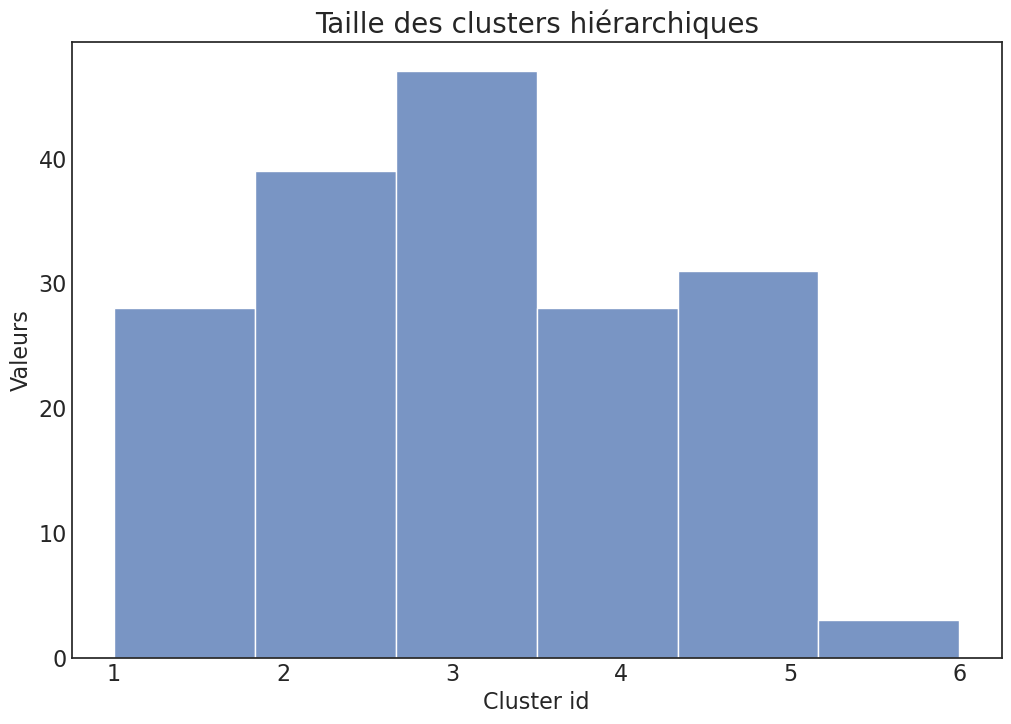

In [149]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(df_clst, x='label', ax=ax, bins=6)

ax.set_title('Taille des clusters hiérarchiques', fontsize=20)
ax.set_xlabel('Cluster id', fontsize=16)
ax.set_ylabel('Valeurs', fontsize=16)
ax.tick_params(axis='x', labelsize=16, labelrotation=0)
ax.tick_params(axis='y', labelsize=16)
#plt.savefig('Taille des clusters.png', transparent=True)

plt.show();

#### Affichage du contenu des clusters

In [150]:
for i in range(n_cluster):
    elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
    size = len(elements)
    print(f'Cluster {i+1} ({size} pays):\n')
    print(*elements, sep = ', ')
    print('\n')

Cluster 1 (28 pays):

Angola, Benin, Botswana, Cabo Verde, Comoros, Congo, Djibouti, Gabon, Gambia, Ghana, Guinea, Haiti, Iraq, Kiribati, Kyrgyzstan, Lesotho, Liberia, Maldives, Mauritania, Namibia, Oman, Papua New Guinea, Sao Tome and Principe, Solomon Islands, Tajikistan, Timor-Leste, Turkmenistan, Vanuatu


Cluster 2 (39 pays):

Afghanistan, Bangladesh, Burkina Faso, Burundi, Cambodia, Cameroon, Central African Republic, Chad, Cote d'Ivoire, Democratic People's Republic of Korea, Democratic Republic of the Congo, Eswatini, Ethiopia, Guinea-Bissau, India, Indonesia, Kenya, Lao People's Democratic Republic, Madagascar, Malawi, Mali, Mozambique, Nepal, Niger, Nigeria, Pakistan, Paraguay, Philippines, Rwanda, Senegal, Sierra Leone, Sri Lanka, Sudan, Togo, Uganda, United Republic of Tanzania, Yemen, Zambia, Zimbabwe


Cluster 3 (47 pays):

Algeria, Antigua and Barbuda, Azerbaijan, Bahamas, Barbados, Belize, Bolivia (Plurinational State of), Chile, Colombia, Dominica, Dominican Republic, 

In [151]:
with open('Détail des clusters.txt', 'w') as f:
    for i in range(n_cluster):
        elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
        size = len(elements)
        print(f'Cluster {i+1} ({size} pays):\n', file=f)
        print(*elements, sep = ', ', file=f)
        print('\n', file=f)

In [152]:
clusters # dans l'ordre des index du dataset

array([2, 4, 3, 1, 3, 5, 4, 5, 5, 3, 3, 2, 3, 4, 5, 3, 1, 3, 4, 1, 6, 4,
       2, 2, 1, 2, 2, 5, 2, 2, 3, 6, 3, 1, 1, 4, 2, 4, 4, 4, 4, 2, 2, 5,
       1, 3, 3, 3, 3, 3, 4, 2, 2, 3, 5, 5, 3, 1, 1, 4, 5, 1, 5, 3, 3, 1,
       2, 3, 1, 3, 4, 5, 2, 2, 3, 1, 5, 5, 5, 3, 5, 3, 4, 2, 1, 5, 1, 2,
       4, 3, 1, 1, 3, 4, 5, 2, 2, 3, 1, 2, 4, 1, 3, 5, 4, 4, 3, 2, 3, 1,
       2, 5, 3, 5, 3, 2, 2, 4, 5, 1, 2, 3, 1, 2, 3, 2, 4, 5, 5, 3, 4, 5,
       2, 3, 3, 3, 3, 1, 5, 2, 4, 3, 2, 4, 4, 1, 5, 5, 2, 2, 3, 5, 5, 3,
       1, 4, 1, 2, 3, 3, 3, 1, 2, 4, 5, 5, 2, 6, 4, 3, 1, 3, 3, 2, 2, 2],
      dtype=int32)

In [153]:
df[:3]

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,
Afghanistan,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96


In [154]:
df.insert(0, 'Cluster', clusters)
df[:5]

,Cluster,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,,
Afghanistan,2,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,4,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,3,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96
Angola,1,30.99,24.96,0.0,89.10,2451.0,53.80,16.67,41.0,335.0,0.0,4.16,29.58,3289.64
Antigua and Barbuda,3,63.70,36.80,0.0,100.00,2470.0,80.96,51.57,0.0,7.0,0.0,18.98,11.31,16672.74


In [155]:
# filt = (df['Cluster'] == 1)
# df.loc[filt, 'Cluster']

In [156]:
# for i in range(1, 7):

#     filt = (df['Cluster'] == i)
#     df_xl = df.loc[filt, 'Cluster']
#     df_xl.to_excel(f'Group{i}.xlsx')

In [157]:
df[:5]

,Cluster,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,,
Afghanistan,2,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,4,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,3,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96
Angola,1,30.99,24.96,0.0,89.10,2451.0,53.80,16.67,41.0,335.0,0.0,4.16,29.58,3289.64
Antigua and Barbuda,3,63.70,36.80,0.0,100.00,2470.0,80.96,51.57,0.0,7.0,0.0,18.98,11.31,16672.74


## ACP

In [158]:
df.columns

Index(['Cluster', 'Protein animal/ Protein total',
       'Protein poultry/ Protein animal', 'Ratio export poultry',
       'Ratio import poultry', 'Food total', 'Protein total', 'Protein animal',
       'Production poultry', 'Import poultry', 'Export poultry',
       'Protein poultry', 'Var pop', 'Pib'],
      dtype='object')

In [159]:
df.columns[1:]

Index(['Protein animal/ Protein total', 'Protein poultry/ Protein animal',
       'Ratio export poultry', 'Ratio import poultry', 'Food total',
       'Protein total', 'Protein animal', 'Production poultry',
       'Import poultry', 'Export poultry', 'Protein poultry', 'Var pop',
       'Pib'],
      dtype='object')

Distribution des variables


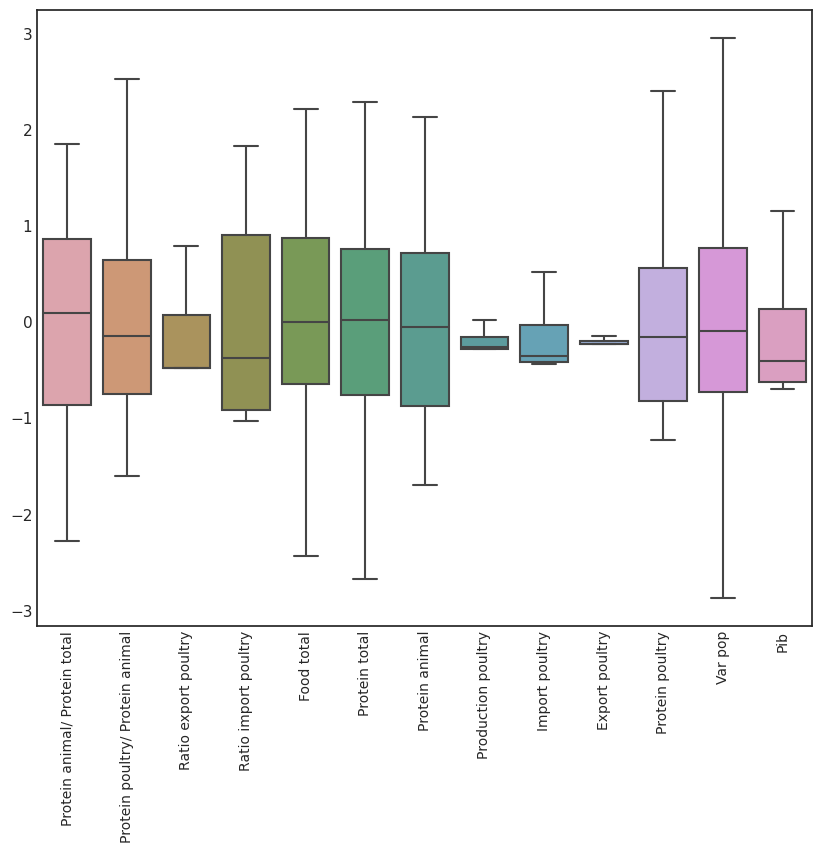

In [160]:
print('Distribution des variables')
sns.set_style('white')
plt.figure(figsize=(10, 8))
plt.tick_params(axis='x', labelsize=10, labelrotation=90)
sns.boxplot(data=pd.DataFrame(X_scaled, index = df.index, columns = df.columns[1:]), saturation=0.5, showfliers=False)
plt.show();

In [161]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c='red',marker='o')
    plt.xticks(np.arange(len(scree))+1)
    plt.xlabel('rang de l\'axe d\'inertie')
    plt.ylabel('pourcentage d\'inertie')
    plt.title('Eboulis des valeurs propres')

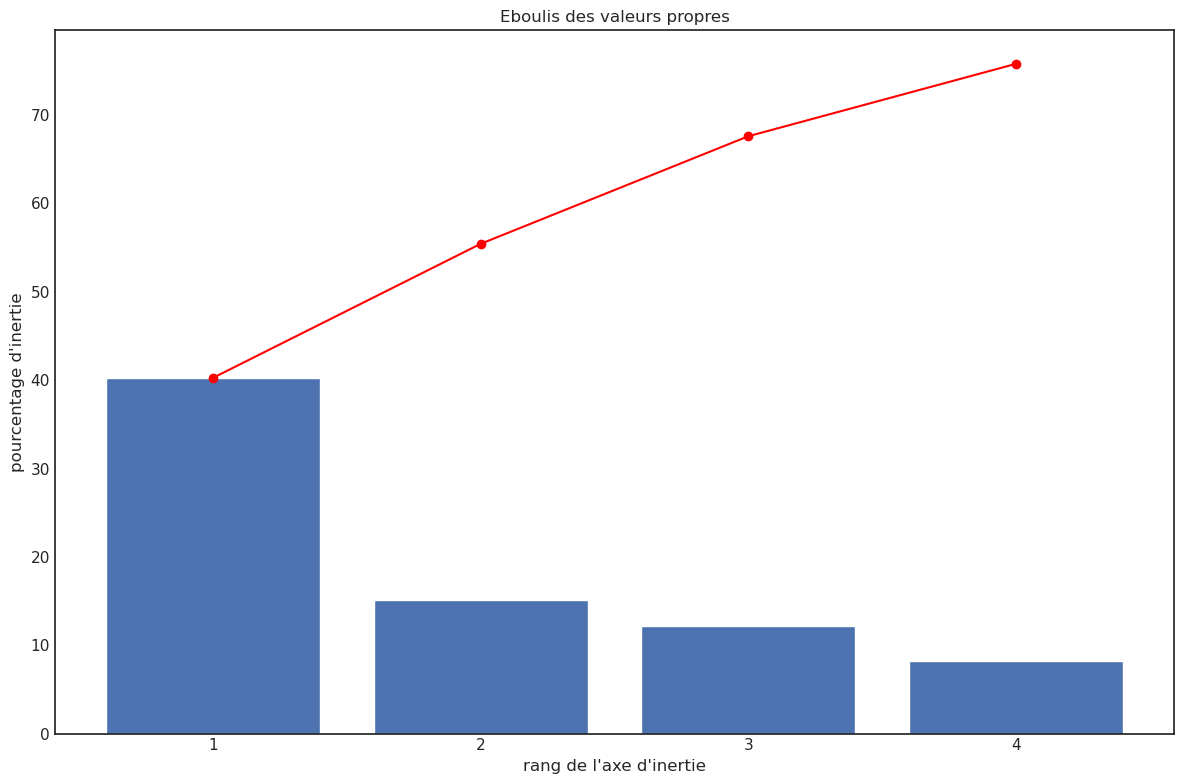

In [162]:
# Eboulis des valeurs propres
plt.figure(layout='tight', figsize=(12, 8))
display_scree_plot(pca)
plt.show()

In [163]:
np.round(100/(len(df.columns)-1), 2)

7.69

In [164]:
# On a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à (100/p)% avec p, nombre de variables.

In [165]:
print(f'Avec {len(df.columns)-1} variables, on a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à {np.round(100/(len(df.columns)-1), 2)} %')

Avec 13 variables, on a tendance à ne pas considérer comme importants les axes dont l’inertie associée est inférieure à 7.69 %


In [166]:
df_Xprojected = pd.DataFrame(scaled_projected, index = df.index, columns = ['F' + str(i+1) for i in range(n_comp)])
df_Xprojected[:5]

,F1,F2,F3,F4
Area,,,,
Afghanistan,-3.302157,0.752683,-0.418742,0.622085
Albania,1.406233,-0.223009,-1.798583,-0.518261
Algeria,-0.898085,0.876183,-1.130208,-0.900198
Angola,-2.337742,-0.232973,1.253145,2.092901
Antigua and Barbuda,0.969131,-2.661180,1.765026,0.701133


In [167]:
df_Xprojected.insert(0, 'Cluster', df.loc[:, 'Cluster'])
df_Xprojected[:5]

,Cluster,F1,F2,F3,F4
Area,,,,,
Afghanistan,2,-3.302157,0.752683,-0.418742,0.622085
Albania,4,1.406233,-0.223009,-1.798583,-0.518261
Algeria,3,-0.898085,0.876183,-1.130208,-0.900198
Angola,1,-2.337742,-0.232973,1.253145,2.092901
Antigua and Barbuda,3,0.969131,-2.661180,1.765026,0.701133


In [168]:
# print_pays = ['Burundi', 'United States of America', 'Saint Vincent and the Grenadines', 'China', 'Brazil', 'Ukraine', 'Viet Nam',
#               'Netherlands', 'England', 'Australia', 'Thailand', 'Congo', 'India', 'France', 'French Polynesia']

In [169]:
# filt = df_Xprojected.index.isin(print_pays)
# df_Xprojected = df_Xprojected.loc[filt, :]

In [170]:
pc1 = pca.components_[0]

my_dict = {key:value for (key, value) in zip(df.columns[1:], pc1)}

print('F1')
print(my_dict)

F1
{'Protein animal/ Protein total': 0.37928413005937495, 'Protein poultry/ Protein animal': 0.09491678302079672, 'Ratio export poultry': 0.2248252055251226, 'Ratio import poultry': -0.02756620425628406, 'Food total': 0.37250192841396557, 'Protein total': 0.38859411490663226, 'Protein animal': 0.41197110327878844, 'Production poultry': 0.15985198158410233, 'Import poultry': 0.13595551197185715, 'Export poultry': 0.18671248555892722, 'Protein poultry': 0.2982448063307228, 'Var pop': -0.2581310059869585, 'Pib': 0.3191631734866381}


In [171]:
pc2 = pca.components_[1]

my_dict = {key:value for (key, value) in zip(df.columns[1:], pc2)}

print('F2')
print(my_dict)

F2
{'Protein animal/ Protein total': -0.20660865724875102, 'Protein poultry/ Protein animal': -0.3502023749244027, 'Ratio export poultry': 0.23356952578128062, 'Ratio import poultry': -0.3314173957240993, 'Food total': 0.04814698320889626, 'Protein total': -0.02257898489755798, 'Protein animal': -0.12845657831460253, 'Production poultry': 0.500381470067067, 'Import poultry': 0.2640631312015956, 'Export poultry': 0.4782346752368296, 'Protein poultry': -0.3168121995970478, 'Var pop': 0.0205166862364613, 'Pib': -0.036601216489773124}


In [172]:
f1, f2 = (0, 1)
scree = pca.explained_variance_ratio_*100

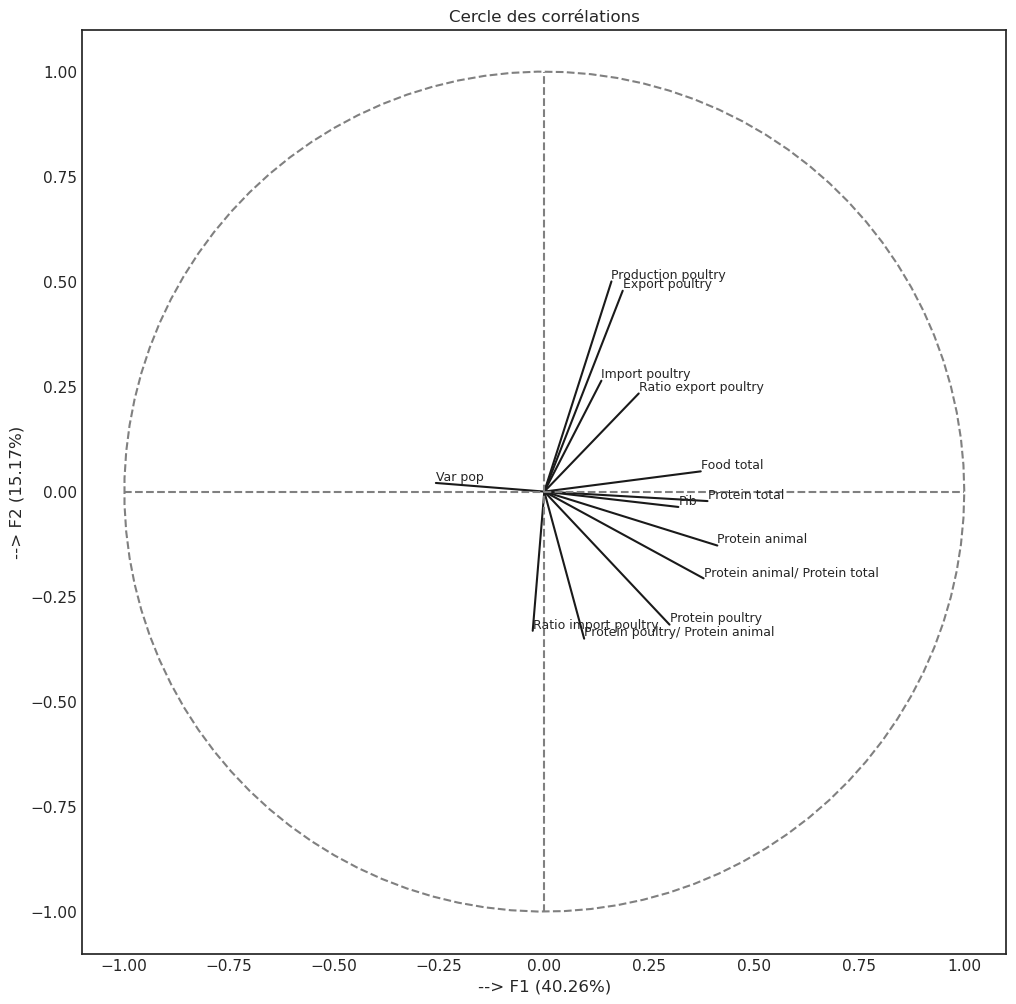

In [173]:
plt.figure(figsize = (12, 12))
plt.style.use('seaborn-v0_8-white')

# Contribution de chaque variable aux composantes principales.
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[f1, :], pcs[f2, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i+1])
    plt.text(x, y, df.columns[i+1], fontsize='9', ha='left',va='bottom')

# Afficher une ligne horizontale y=0
plt.plot([-1, 1], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# Add a unit circle for scale
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an), color='grey', ls='--')  

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel(f'--> F1 ({np.round(scree[f1], 2)}%)')
plt.ylabel(f'--> F2 ({np.round(scree[f2], 2)}%)')
plt.title(f'Projection des individus sur F{f1+1} et F{f2+1}')

# limites du graphique       
#plt.axis([-.6, .6, -.6, .6])

#Set equal scaling (i.e., make circles circular) by changing axis limits. 
plt.axis('square')

#plt.savefig('fig1.png', transparent=False)
plt.title('Cercle des corrélations')
#plt.savefig('Cercle des corrélations.png', transparent=True);
plt.show()

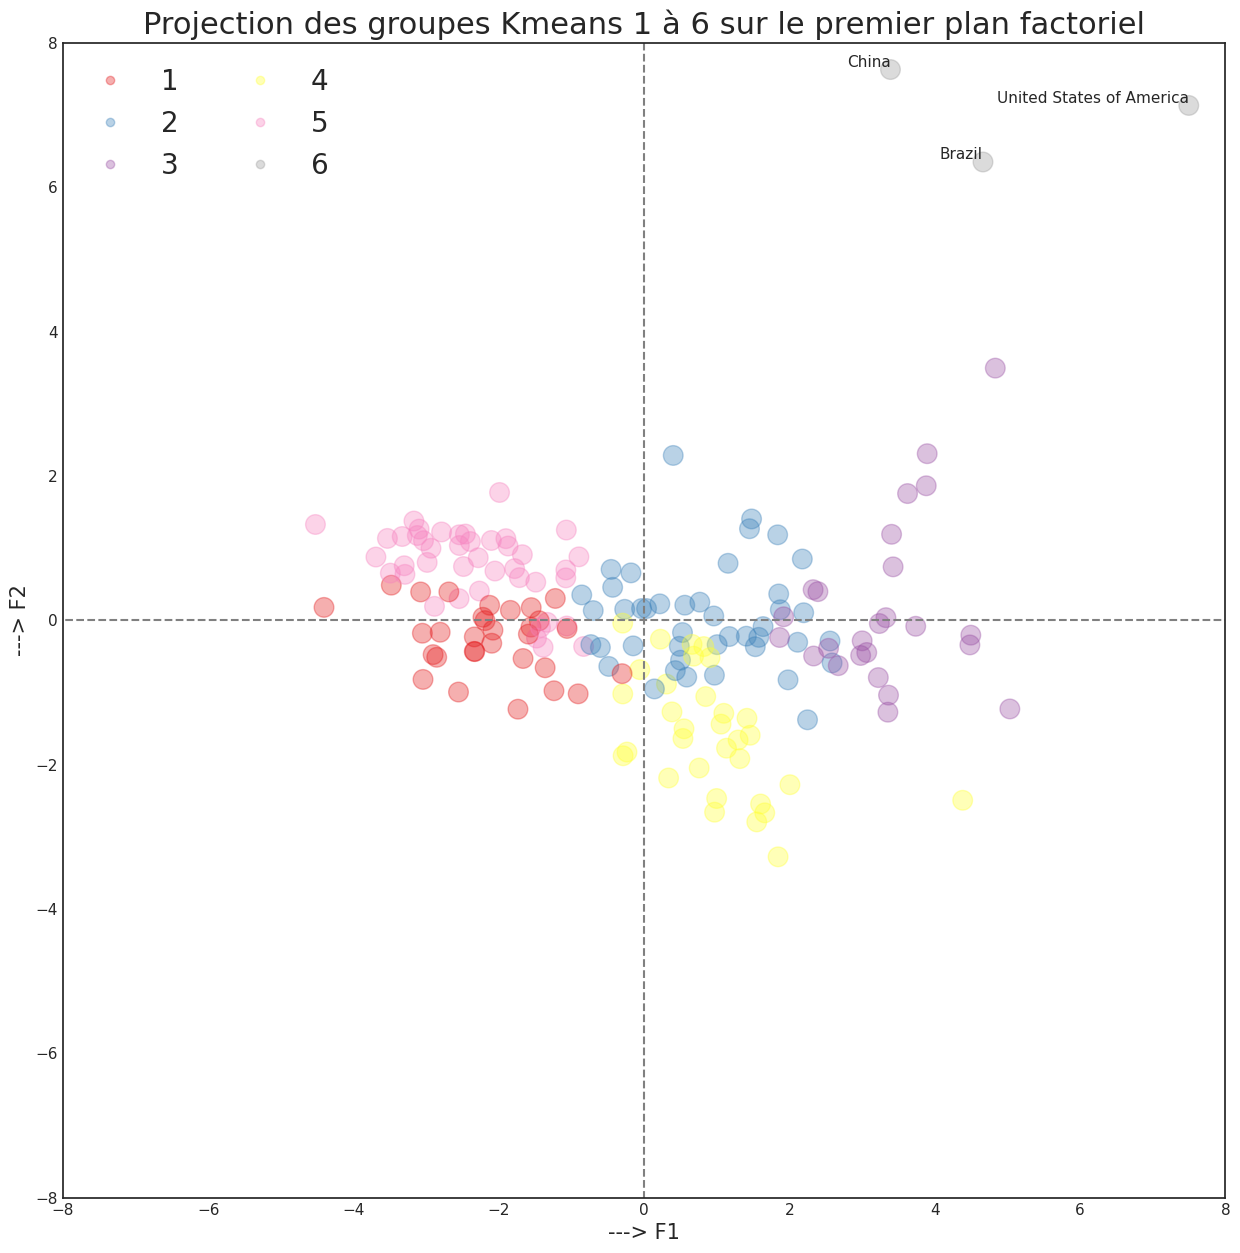

In [174]:
fig = plt.figure(figsize=(15, 15))
plt.style.use('seaborn-v0_8-white')

# affichage des observations
#obs = plt.scatter(X_projected[:, f1], X_projected[:, f2], c=clusters, cmap='jet', s=200, alpha=.35)

# affichage des observations
obs = plt.scatter(df_scaled_projected.loc[:, 'F1'], df_scaled_projected.loc[:, 'F2'], c=k_clusters, cmap='Set1', s=200, alpha=.35)

# affichage des labels des points
for i, (x, y) in enumerate(zip(df_scaled_projected.loc[:, 'F1'], df_scaled_projected.loc[:, 'F2'])):
    if pd.DataFrame(df_scaled_projected).index[i] in (['Brazil', 'China', 'United States of America']):
        plt.text(x, y, df_scaled_projected.index[i], fontsize='11', ha='right', va='bottom')
        
# affichage des lignes horizontales et verticales
plt.plot([-10, 10], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-10, 10], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel(f'---> F1', fontsize='15')
plt.ylabel(f'---> F2', fontsize='15')

# limites du graphique       
plt.xlim([-8, 8])
plt.ylim([-8, 8])

plt.legend(*obs.legend_elements(), bbox_to_anchor=(.25, 1), ncol=2, fontsize=20)
plt.title(f'Projection des groupes Kmeans 1 à 6 sur le premier plan factoriel', fontsize=22)

#plt.savefig('Projection1.png', transparent=True)
plt.show();

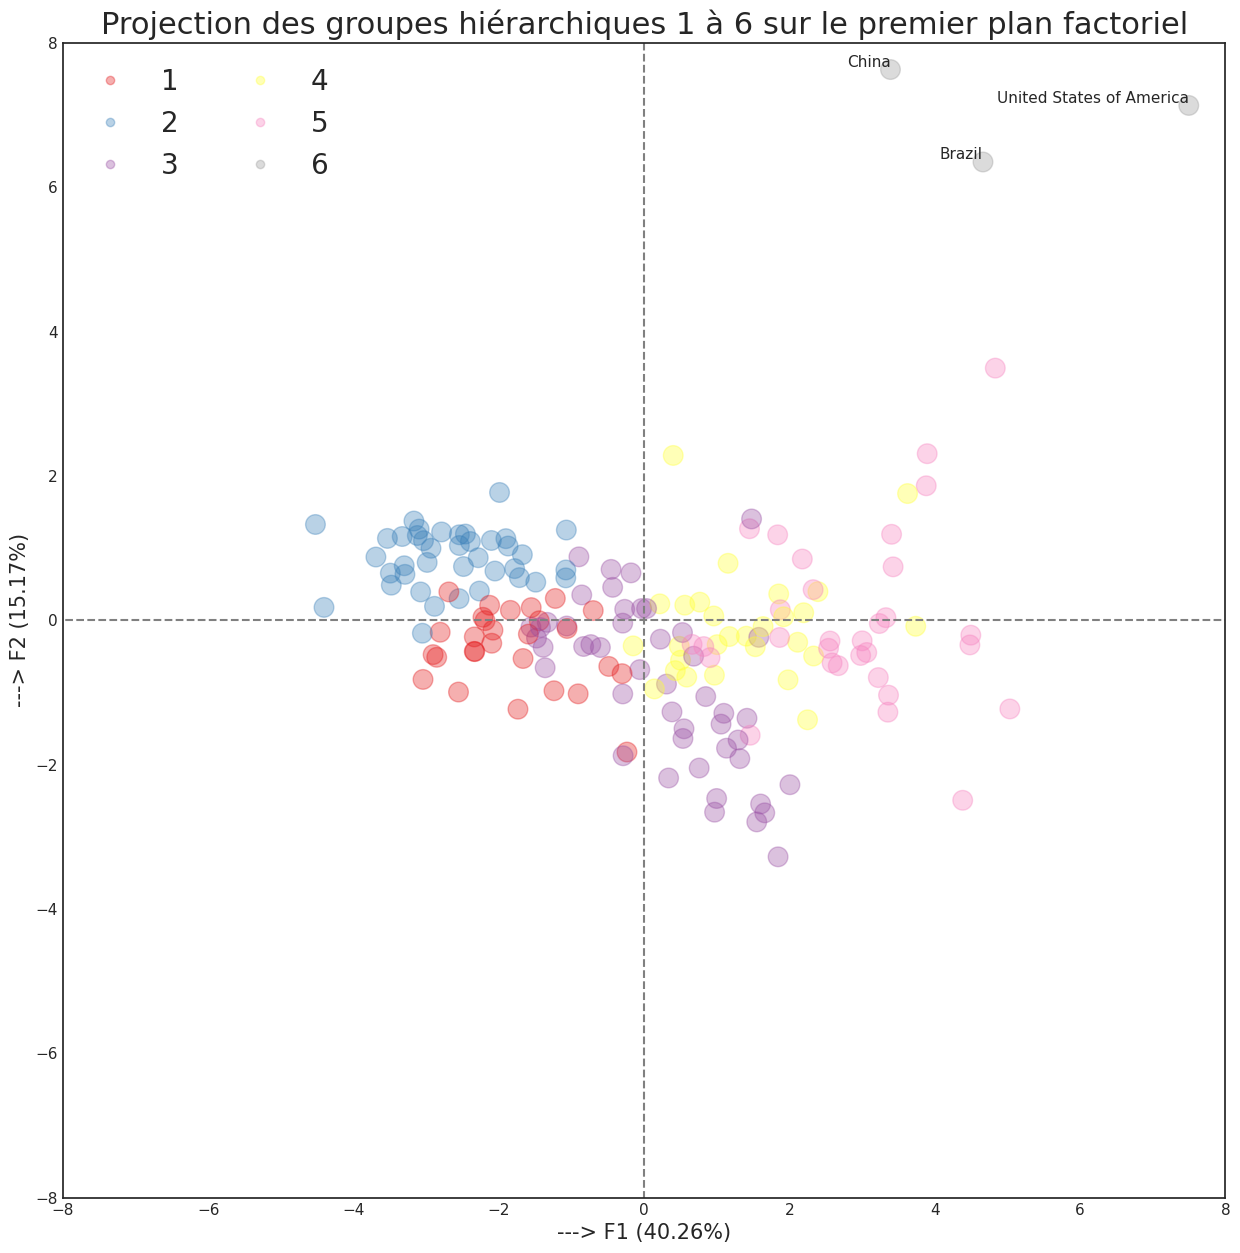

In [175]:
fig = plt.figure(figsize=(15, 15))
plt.style.use('seaborn-v0_8-white')

# affichage des observations
#obs = plt.scatter(X_projected[:, f1], X_projected[:, f2], c=clusters, cmap='jet', s=200, alpha=.35)

# affichage des observations
obs = plt.scatter(df_Xprojected.loc[:, 'F1'], df_Xprojected.loc[:, 'F2'], c=df_Xprojected.loc[:, 'Cluster'], cmap='Set1', s=200, alpha=.35)

# affichage des labels des points
for i, (x, y) in enumerate(zip(df_Xprojected.loc[:, 'F1'], df_Xprojected.loc[:, 'F2'])):
    if pd.DataFrame(df_Xprojected).index[i] in (['Brazil', 'China', 'United States of America']):
        plt.text(x, y, df_Xprojected.index[i], fontsize='11', ha='right', va='bottom')
        
# affichage des lignes horizontales et verticales
plt.plot([-10, 10], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-10, 10], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel(f'---> F1 ({np.round(scree[f1], 2)}%)', fontsize='15')
plt.ylabel(f'---> F2 ({np.round(scree[f2], 2)}%)', fontsize='15')

# limites du graphique       
plt.xlim([-8, 8])
plt.ylim([-8, 8])

plt.legend(*obs.legend_elements(), bbox_to_anchor=(.25, 1), ncol=2, fontsize=20)
plt.title(f'Projection des groupes hiérarchiques 1 à 6 sur le premier plan factoriel', fontsize=22)

#plt.savefig('Projection1.png', transparent=True)
plt.show();

In [176]:
df_Xprojected[:3]

,Cluster,F1,F2,F3,F4
Area,,,,,
Afghanistan,2,-3.302157,0.752683,-0.418742,0.622085
Albania,4,1.406233,-0.223009,-1.798583,-0.518261
Algeria,3,-0.898085,0.876183,-1.130208,-0.900198


In [177]:
df_Xprojected[-3:]

,Cluster,F1,F2,F3,F4
Area,,,,,
Yemen,2,-3.052585,-0.182054,1.591314,0.071043
Zambia,2,-2.986526,0.798628,-0.351618,0.038019
Zimbabwe,2,-3.292579,0.633357,0.083333,-0.557028


In [178]:
filt = (df_Xprojected['Cluster'] == 6)
display(df_Xprojected.loc[filt])
filt = (df_Xprojected.loc[:, 'Cluster'] == 6)
display(df_Xprojected.loc[filt, 'F1'])

,Cluster,F1,F2,F3,F4
Area,,,,,
Brazil,6,4.663295,6.345995,4.892932,-1.374531
China,6,3.389988,7.626434,4.157278,2.675319
United States of America,6,7.495648,7.129159,5.653732,-0.719611


Area
Brazil                      4.663295
China                       3.389988
United States of America    7.495648
Name: F1, dtype: float64

#### Je ne représente pas le cluster 6 (Brazil, China et USA) dans les 2 vues suivantes.

In [179]:
# fig = plt.figure(figsize=(15, 15))
# plt.style.use('seaborn-v0_8-white')

# # affichage des observations
# #obs = plt.scatter(X_projected[:, f1], X_projected[:, f2], c=clusters, cmap='jet', s=200, alpha=.35)

# # affichage des observations
# obs = plt.scatter(df_Xprojected.loc[~filt, 'F1'], df_Xprojected.loc[~filt, 'F2'], c=df_Xprojected.loc[~filt, 'Cluster'], cmap='jet', s=200, alpha=.35)
        
# # affichage des lignes horizontales et verticales
# plt.plot([-10, 10], [0, 0], color='grey', ls='--')
# plt.plot([0, 0], [-10, 10], color='grey', ls='--')

# # nom des axes, avec le pourcentage d'inertie expliqué
# plt.xlabel(f'--> F1 ({np.round(scree[f1], 2)}%)', fontsize='15')
# plt.ylabel(f'--> F2 ({np.round(scree[f2], 2)}%)', fontsize='15')

# # limites du graphique       
# plt.xlim([-6, 6])
# plt.ylim([-5, 5])

# plt.legend(*obs.legend_elements(), bbox_to_anchor=(.25, 1), ncol=2, fontsize=20)
# plt.title(f'Projection des groupes 1 à 5 sur le premier plan factoriel', fontsize=22)

# plt.savefig('Projection2.png', transparent=True)
# plt.show();

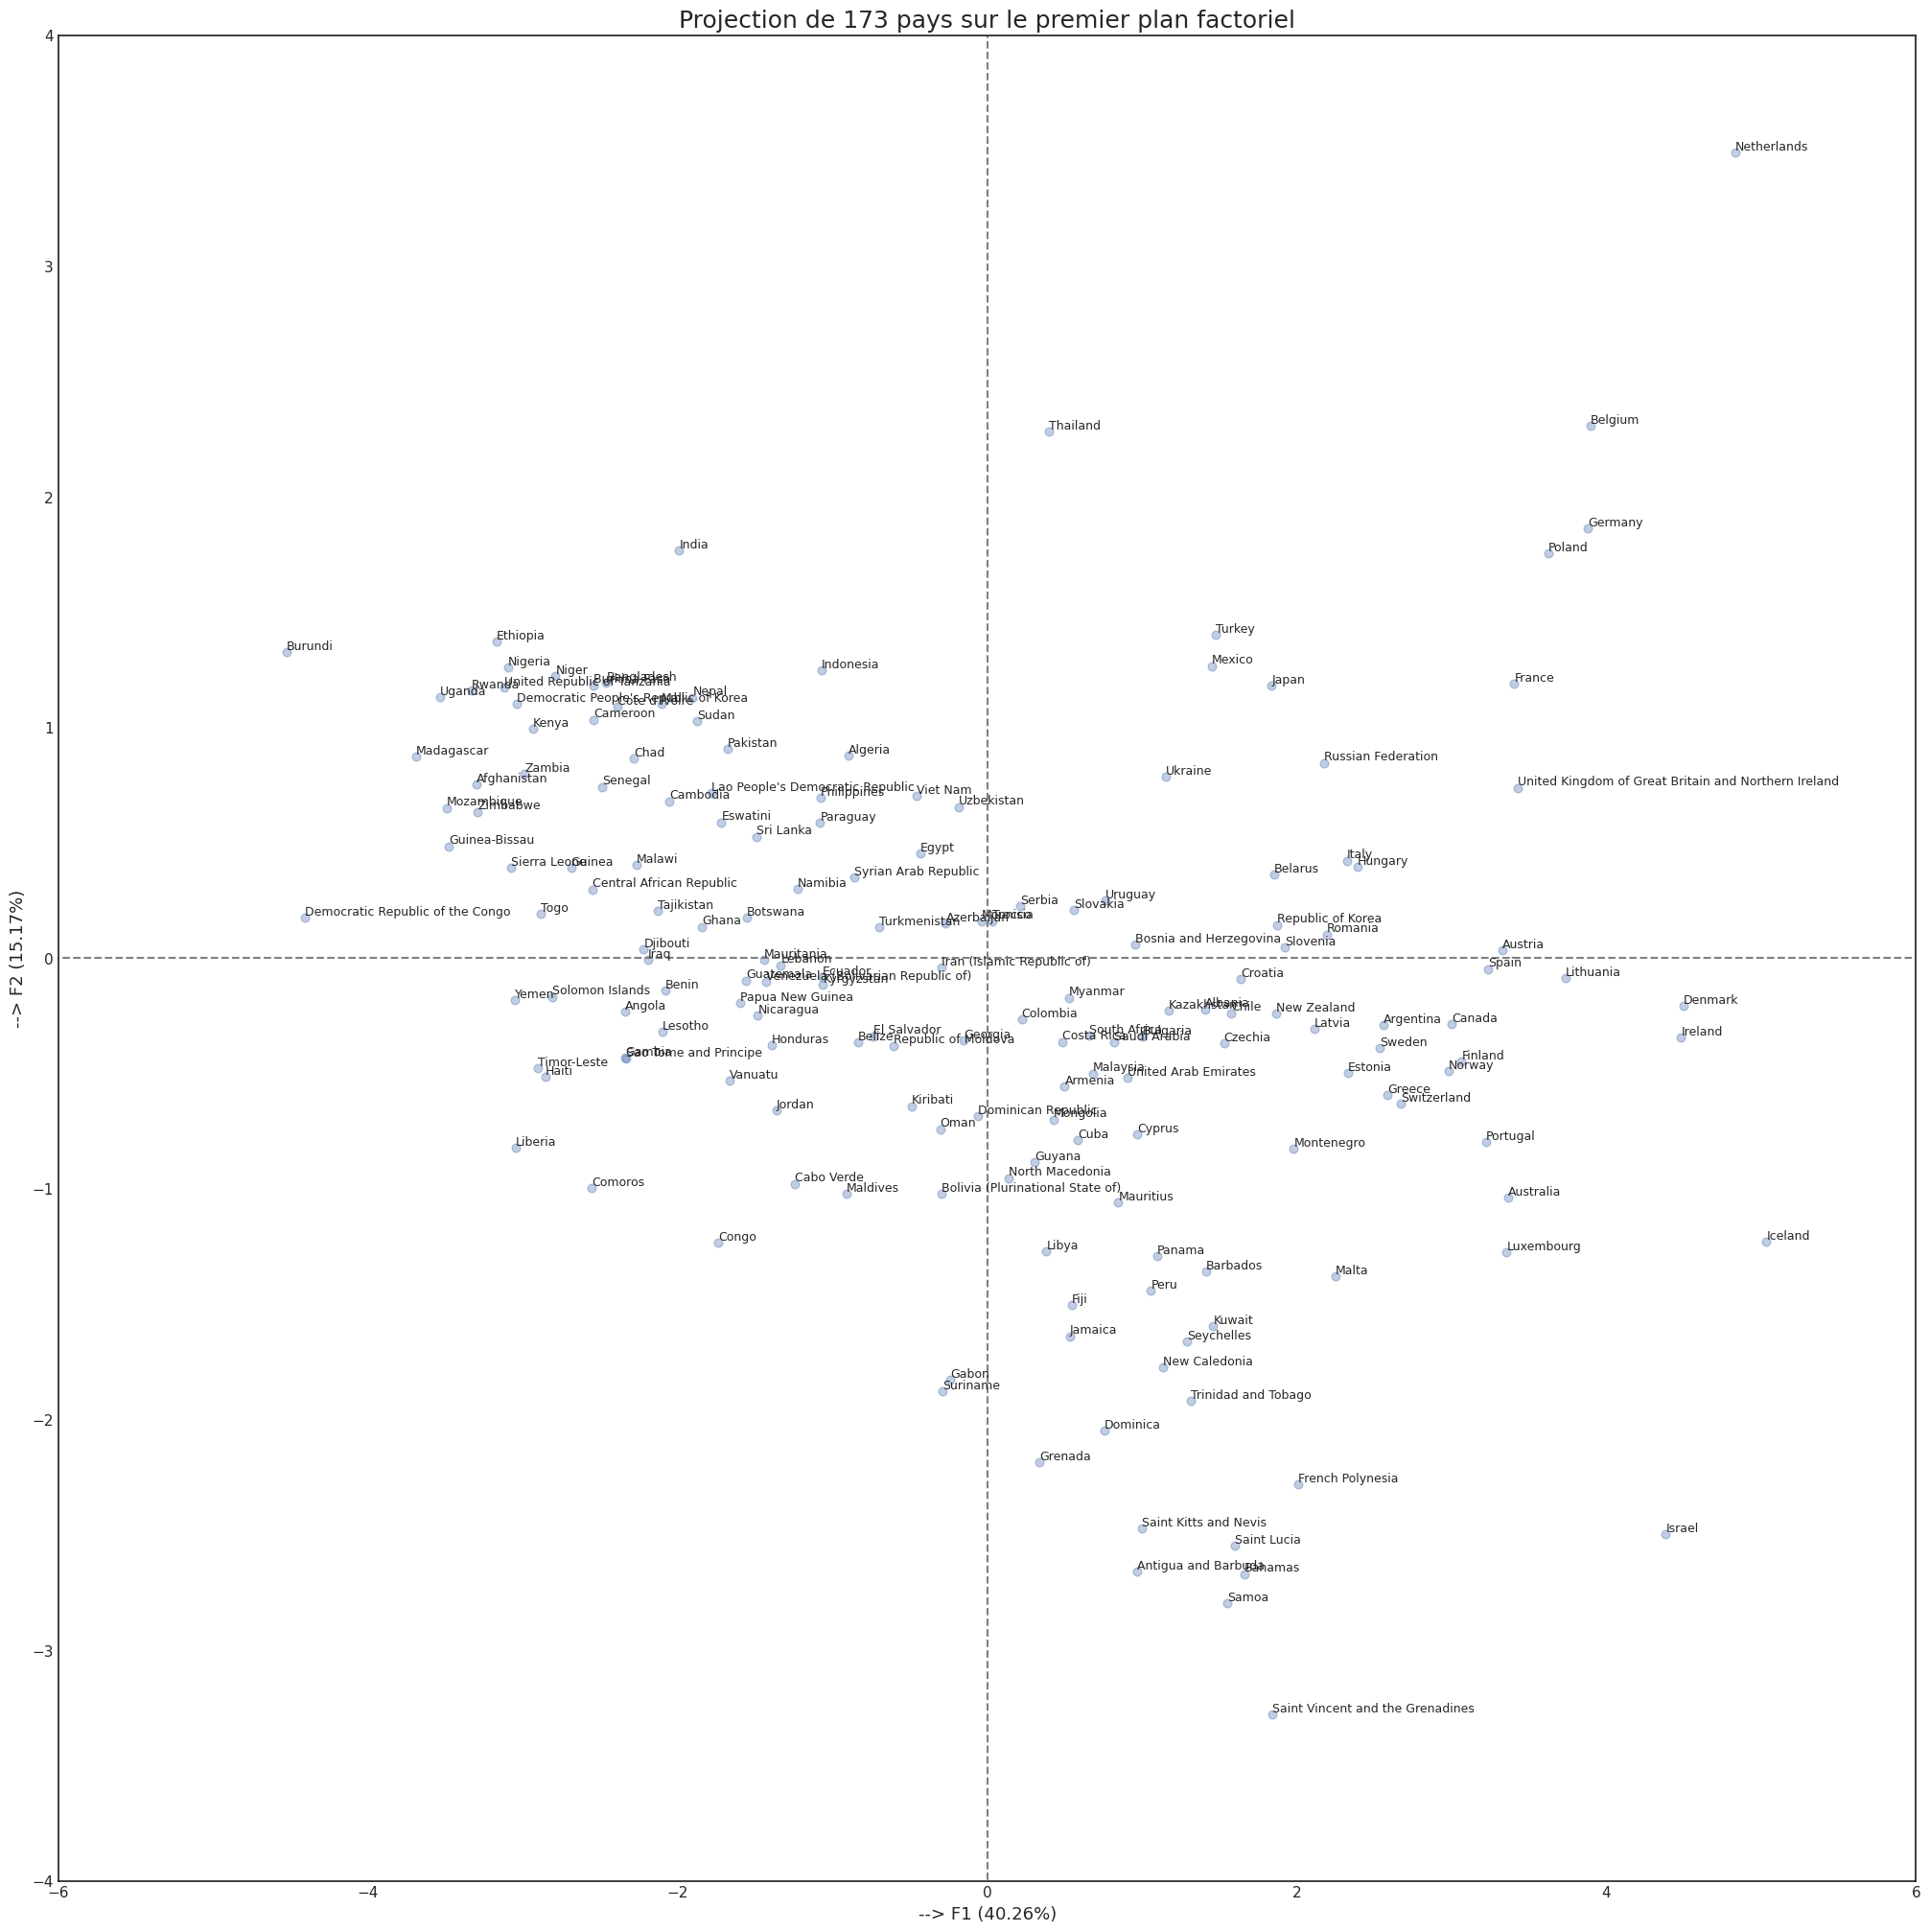

In [180]:
plt.style.use('seaborn-v0_8-white')

fig, ax = plt.subplots(figsize=(25, 25))

# affichage des observations
ax.scatter(df_Xprojected.loc[~filt, 'F1'], df_Xprojected.loc[~filt, 'F2'], c='b', s=40, alpha=.35)

# affichage des labels des points
for i, (x, y) in enumerate(zip(df_Xprojected.loc[~filt, 'F1'], df_Xprojected.loc[~filt, 'F2'])):
    ax.text(x, y, df_Xprojected.loc[~filt].index[i], fontsize='9', ha='left', va='bottom')

# affichage des lignes horizontales et verticales
ax.plot([-10, 10], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-10, 10], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
ax.set_xlabel(f'--> F1 ({np.round(scree[f1], 2)}%)', loc='center', fontsize='13')
ax.set_ylabel(f'--> F2 ({np.round(scree[f2], 2)}%)', loc='center', fontsize='13')

ax.set_title(f'Projection de {df_Xprojected.loc[~filt].shape[0]} pays sur le premier plan factoriel', fontsize='18')

# limites du graphique
ax.set(xlim=(-6, 6), ylim=(-4, 4))
#ax.set_aspect('equal', adjustable='datalim')

plt.show();

In [181]:
# for nc in range(1, 7):
    
#     filt = (df_Xprojected['Cluster'] == nc)
#     label = f'Cluster {nc}'

#     fig = plt.figure(figsize=(18, 18))
#     plt.style.use('seaborn-white')

#     # affichage des observations
#     plt.scatter(df_Xprojected.loc[filt, 'F1'], df_Xprojected.loc[filt, 'F2'], color=f'C{nc}', s=200, alpha=.35, label=label)
        
#     # affichage des labels des points
#     for i, (x, y) in enumerate(zip(df_Xprojected.loc[filt, 'F1'], df_Xprojected.loc[filt, 'F2'])):
#         plt.text(x, y, df_Xprojected.loc[filt].index[i], fontsize='11', ha='left', va='bottom')

#     # affichage des lignes horizontales et verticales
#     plt.plot([-10, 10], [0, 0], color='grey', ls='--')
#     plt.plot([0, 0], [-10, 10], color='grey', ls='--')

#     # nom des axes, avec le pourcentage d'inertie expliqué
#     plt.xlabel(f'--> F1 ({np.round(scree[f1], 2)}%)', fontsize='14')
#     plt.ylabel(f'--> F2 ({np.round(scree[f2], 2)}%)', fontsize='14')

#     # limites du graphique
#     if nc == 1:
#         plt.xlim([-4, 4])
#         plt.ylim([-2, 2])
  
#     elif nc == 2:
#         plt.xlim([-5, 5])
#         plt.ylim([-2, 2])
    
#     elif nc == 3:
#         plt.xlim([-3, 3])
#         plt.ylim([-4, 4])
    
#     elif nc == 4:
#         plt.xlim([-5, 5])
#         plt.ylim([-3, 3])
    
#     elif nc == 5:
#         plt.xlim([-1, 6])
#         plt.ylim([-4, 4])
    
#     elif nc == 6:
#         plt.xlim([-1, 10])
#         plt.ylim([-1, 10])
    
#     else:
#         plt.xlim([-10, 10])
#         plt.ylim([-10, 10])

#     plt.legend(fontsize='14')
#     plt.title(f'Projection du cluster {nc} sur le premier plan factoriel', fontsize=18)
    
#     plt.savefig(f'Cluster {nc}.png', transparent=True)
#     plt.show();

In [182]:
sns.set_theme(style='white')

Pib en fonction du cluster


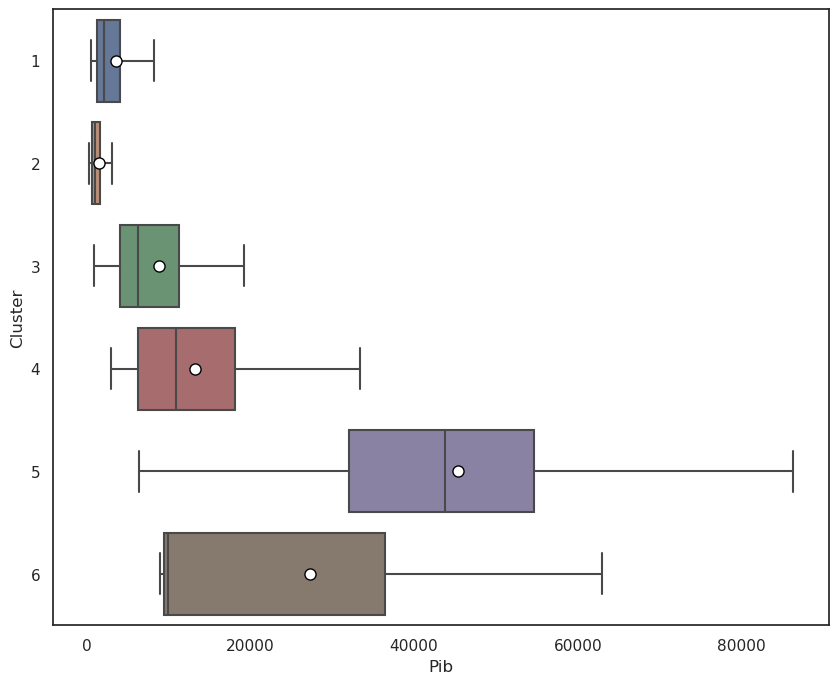

In [183]:
plt.figure(figsize=(10, 8))
print('Pib en fonction du cluster')
sns.boxplot(x='Pib', y='Cluster', data=df, orient='h', saturation=0.5, showfliers=False, showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"});
#plt.savefig('Pib en fonction du cluster.png', transparent=True)

Importations de poulet en fonction du cluster


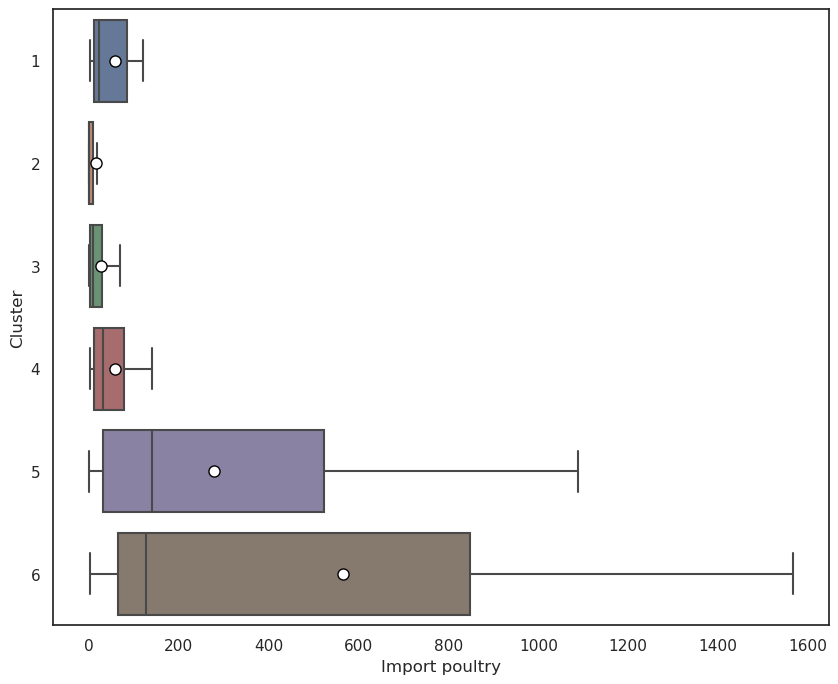

In [184]:
plt.figure(figsize=(10, 8))
print('Importations de poulet en fonction du cluster')
sns.boxplot(x='Import poultry', y='Cluster', data=df, orient='h', saturation=0.5, showfliers=False, showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"});
#plt.savefig('Importations de poulet en fonction du cluster.png', transparent=True)

Exportations de poulet en fonction du cluster


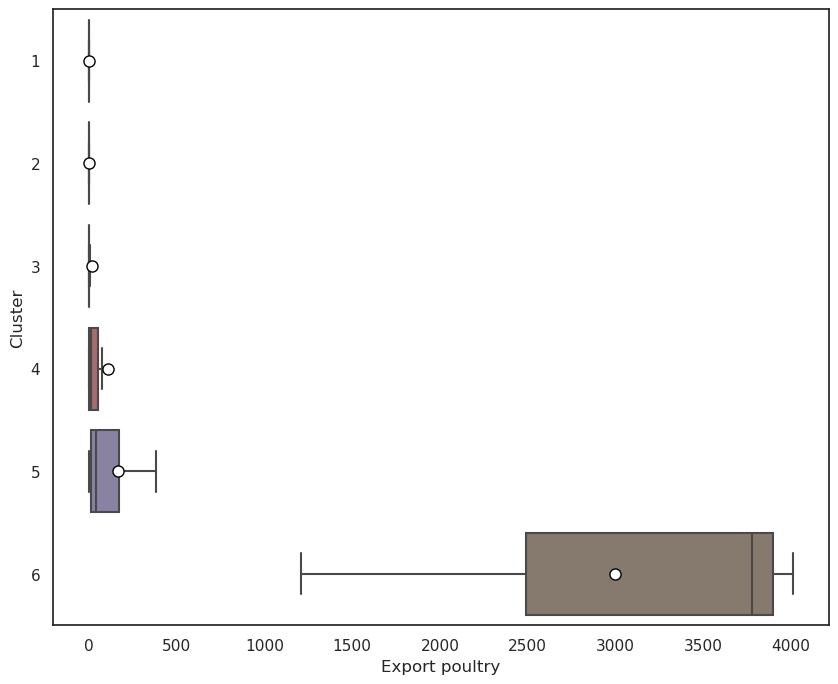

In [185]:
plt.figure(figsize=(10, 8))
print('Exportations de poulet en fonction du cluster')
sns.boxplot(x='Export poultry', y='Cluster', data=df, orient='h', saturation=0.5, showfliers=False, showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"});
#plt.savefig('Exportations de poulet en fonction du cluster.png', transparent=True)

#### Calcul des valeurs médianes pour chaque cluster

In [186]:
df_médian = df.groupby('Cluster').median()
df_médian

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Cluster,,,,,,,,,,,,,
1,32.370,17.25,0.000,86.965,2518.0,64.49,21.355,6.0,23.5,0.0,3.510,20.940,2101.050
2,22.370,6.57,0.000,1.410,2466.0,61.02,12.530,62.0,1.0,0.0,0.870,22.800,995.100
3,47.550,31.25,0.000,12.200,2894.0,82.39,37.600,129.0,10.0,0.0,12.450,10.710,6267.010
4,54.075,15.85,10.885,38.360,3193.5,92.12,50.895,66.5,31.5,10.5,7.415,0.375,10950.815
5,59.110,16.28,8.330,22.990,3394.0,105.95,64.130,554.0,141.0,39.0,10.540,7.440,43839.360
6,57.290,27.24,16.840,0.570,3304.0,104.54,55.510,20728.0,128.0,3776.0,15.600,7.220,9968.780


In [187]:
# create a scaler object
scaler = preprocessing.MinMaxScaler()

# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_médian), columns=df_médian.columns, index=df_médian.index)

df_norm

,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Cluster,,,,,,,,,,,,,
1,0.272183,0.432739,0.000000,1.000000,0.056034,0.077231,0.171027,0.000000,0.160714,0.000000,0.179226,0.917057,0.025813
2,0.000000,0.000000,0.000000,0.009723,0.000000,0.000000,0.000000,0.002702,0.000000,0.000000,0.000000,1.000000,0.000000
3,0.685357,1.000000,0.000000,0.134614,0.461207,0.475629,0.485853,0.005936,0.064286,0.000000,0.786151,0.460870,0.123048
4,0.862956,0.376013,0.646378,0.437410,0.783944,0.692188,0.743508,0.002920,0.217857,0.002781,0.444331,0.000000,0.232370
5,1.000000,0.393436,0.494656,0.259506,1.000000,1.000000,1.000000,0.026445,1.000000,0.010328,0.656483,0.315050,1.000000
6,0.950463,0.837520,1.000000,0.000000,0.903017,0.968618,0.832946,1.000000,0.907143,1.000000,1.000000,0.305240,0.209449


Heatmap


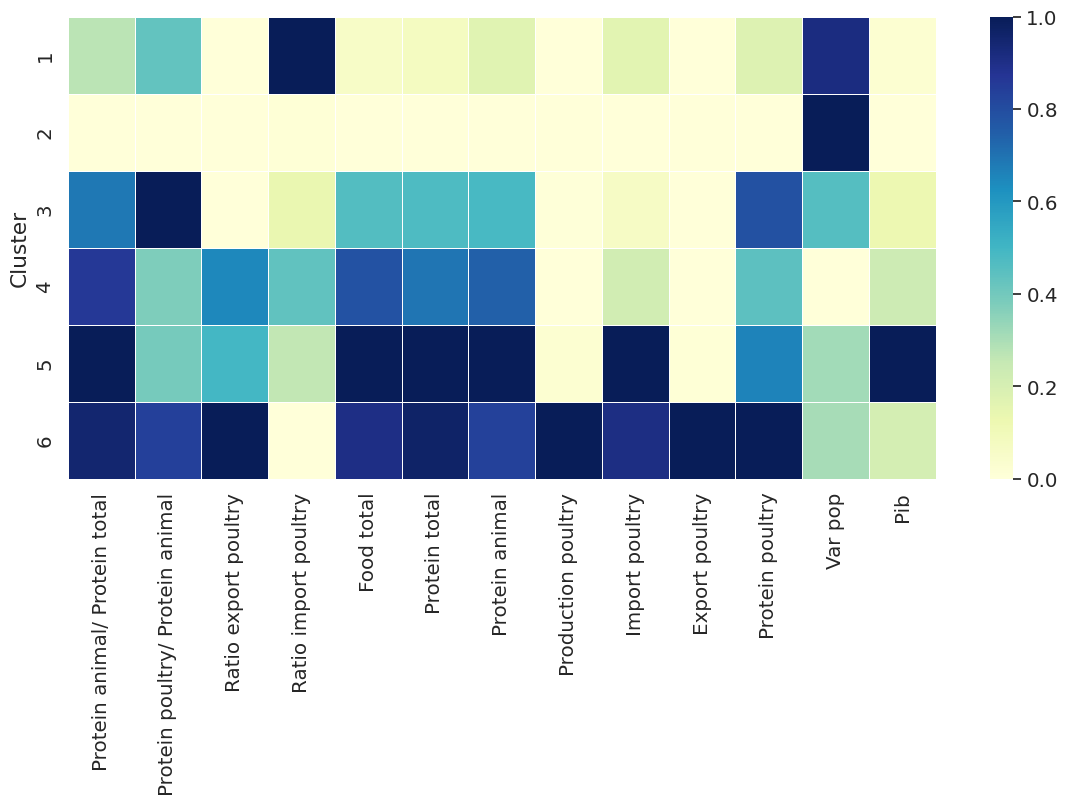

In [188]:
# heatmap
print('Heatmap')
plt.figure(figsize=(14, 6))
sns.set(font_scale=1.3)
sns.heatmap(df_norm, cmap='YlGnBu', linewidths=.5)
plt.show()

Heatmap


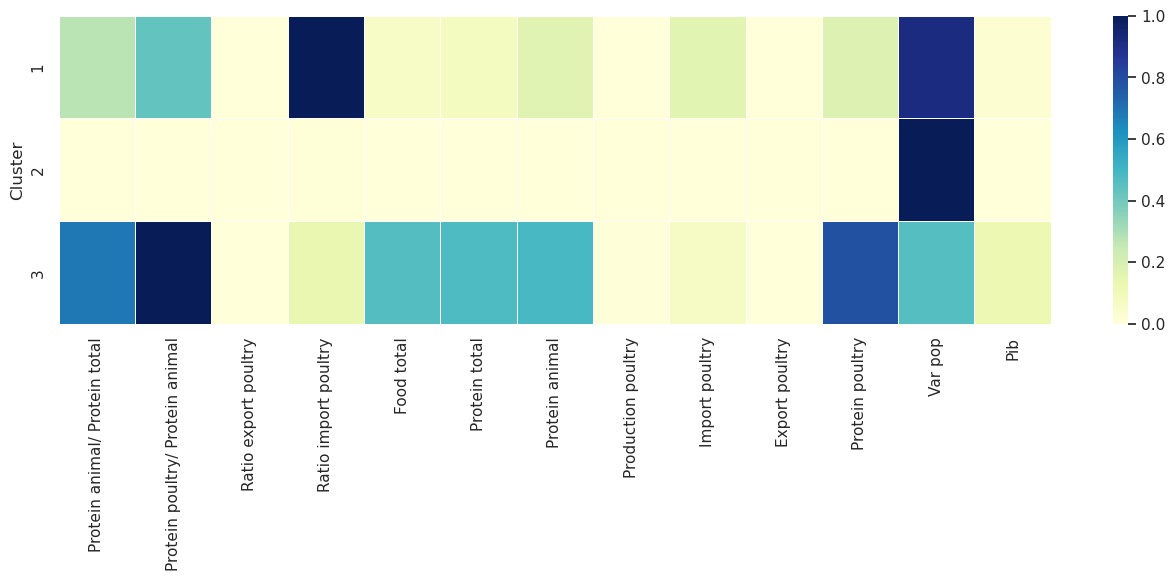

In [189]:
# heatmap
print('Heatmap')
plt.figure(figsize=(16, 4))
sns.set(font_scale=1)
sns.heatmap(df_norm.loc[1:3, :], cmap='YlGnBu', linewidths=.5)
plt.show()

Heatmap


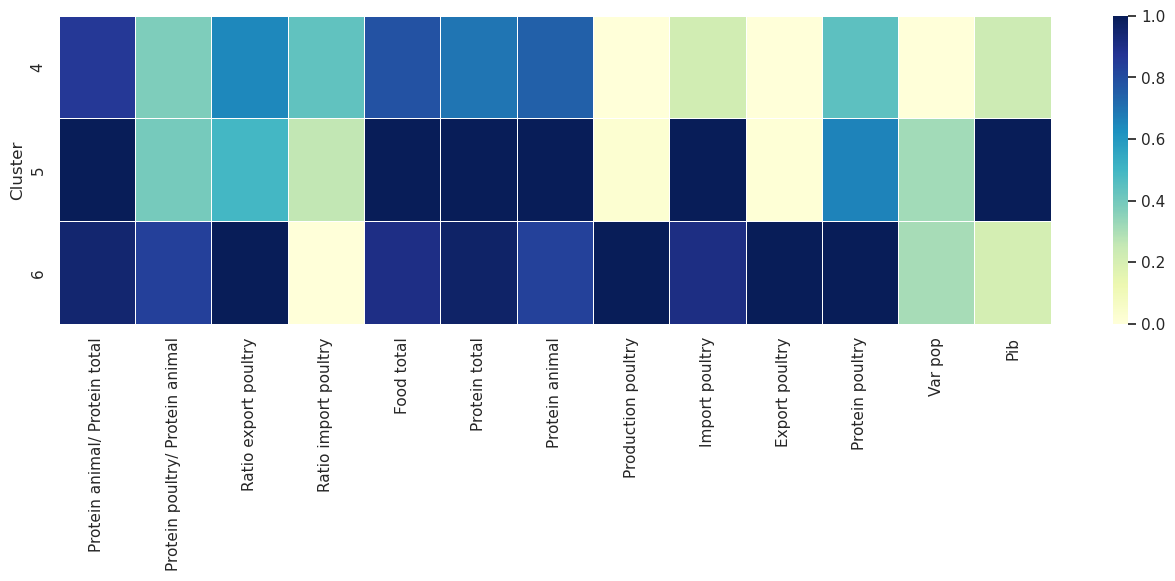

In [190]:
# heatmap
print('Heatmap')
plt.figure(figsize=(16, 4))
sns.set(font_scale=1)
sns.heatmap(df_norm.loc[4:6, :], cmap='YlGnBu', linewidths=.5)
plt.show()

In [191]:
choice_country = ['Italy', 'Republic of Korea', 'New Zealand', 'Austria', 'Spain', 'Argentina',
                  'Sweden', 'Greece', 'Switzerland', 'Canada', 'Finland', 'Norway', 'Portugal', 'Australia', 'Luxembourg']
df.loc[choice_country]

,Cluster,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,,
Italy,5,53.07,14.04,12.76,6.86,3463.0,105.26,55.86,1277.0,94.0,175.0,7.84,2.81,34498.41
Republic of Korea,5,54.66,12.67,3.32,16.11,3449.0,98.20,53.68,885.0,170.0,35.0,6.80,3.89,33705.26
New Zealand,5,56.36,16.28,9.87,0.43,3212.0,97.75,55.09,232.0,1.0,23.0,8.97,9.80,43836.15
Austria,5,60.14,11.62,31.20,42.86,3699.0,109.71,65.98,152.0,114.0,83.0,7.67,6.18,51183.78
Spain,5,62.62,19.80,13.36,10.44,3343.0,109.94,68.84,1622.0,189.0,242.0,13.63,1.34,30457.63
Argentina,5,64.37,20.30,7.75,0.61,3307.0,108.49,69.84,2115.0,13.0,165.0,14.18,9.65,11719.08
Sweden,5,63.44,10.80,10.74,33.47,3175.0,105.21,66.74,161.0,81.0,26.0,7.21,7.37,55703.52
Greece,5,58.18,17.89,10.06,25.00,3366.0,109.73,63.84,246.0,82.0,33.0,11.42,-4.69,20171.53
Switzerland,5,62.94,11.79,1.41,31.69,3378.0,97.32,61.25,97.0,45.0,2.0,7.22,10.59,86315.13


## Réalisation de tests statistiques 

### 1- recherche d'une variable dont la loi est normale, test de Shapiro-Wilk :

- Si la p-value est inférieure à 0.05, la distribution n'est pas une distribution normale
- Si la p-value est supérieure à 0.05, la distribution peut-être normale

In [192]:
def n_test(variable):
    t = scipy.stats.shapiro(df[variable])
    if t[1] >= .05: 
        print(f'Data: df[\'{variable}\']')
        print(f'Test Statistic: {np.round(t[0], 7)}')
        print(f'P-value: {t[1]}')
        print('\n')

In [193]:
# def n_test(variable):
#     t = scipy.stats.shapiro(df[variable])
#     a = f'{variable:<50}'
#     b = f'Test Statistic W: {np.round(t[0], 7):<20}'
#     c = f'P-value: {t[1]:<20}'
#     print(a, b, c)
#     print('\n')

In [194]:
for variable in df.columns[:-1]:
        n_test(variable)

Data: df['Food total']
Test Statistic: 0.9885064
P-value: 0.16377247869968414


Data: df['Protein total']
Test Statistic: 0.992409
P-value: 0.48771002888679504


Data: df['Var pop']
Test Statistic: 0.9925545
P-value: 0.5053619742393494




- Il y a trois candidats potentiels.
- Je choisi la variable 'Protein total'.
- Vérifions que sa loi soit normale.

In [195]:
sns.set_theme(style='white')

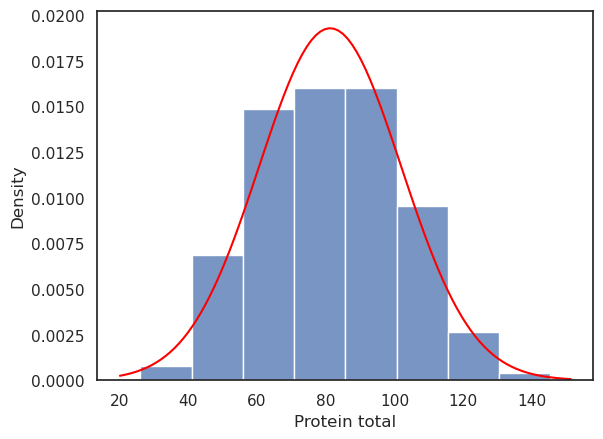

In [196]:
x = df['Protein total']
ax = sns.histplot(x = x, stat='density', bins = int(1+np.log2(len(x))*1))
mu, std = st.norm.fit(x)
xx = np.linspace(*ax.get_xlim(), 100)
ax.plot(xx, st.norm.pdf(xx, mu, std), color='red');

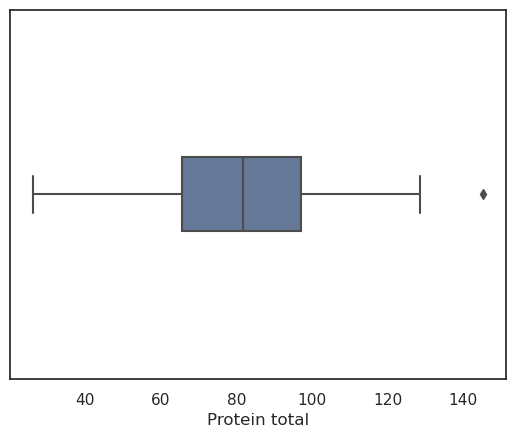

In [197]:
ax = sns.boxplot(x=x, saturation=0.5, width=.2)

### Q–Q plot : Protein total vs loi normale

In a Q-Q plot, the x-axis displays the theoretical quantiles.
This means it doesn’t show your actual data, but instead it represents where your data would be if it were normally distributed.
The y-axis displays your actual data. This means that if the data values fall along a roughly straight line at a 45-degree angle, then the data is normally distributed.

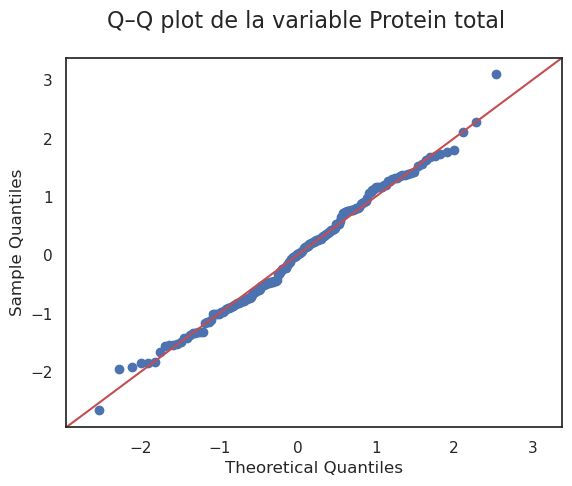

In [198]:
fig = sm.qqplot(df['Protein total'], fit=True, line='45')
fig.suptitle('Q–Q plot de la variable Protein total', fontsize=16)
plt.show()

Suite au trois tests précédents on peut considérer que la variable \'Protein total\' a une distribution normale.

### 2- test de comparaison de deux populations dans le cas gaussien : comparaison de 'Protein total' sur le cluster 2 et le cluster 5

Si on souhaite comparer deux échantillons gaussiens, il nous suffit en fait de comparer leurs paramètres : leur moyenne μ1 et μ2, et leur variance σ1 et σ2.

La méthodologie la plus classique est d'effectuer de manière séquentielle :

- Un test d'égalité des variances (si les variances ne sont pas considérées comme égales, les deux échantillons n'ont pas la même loi)

- Un test d'égalité des moyennes (si les variances sont considérées comme égales, il est possible de tester l'égalité des moyennes en utilisant une variance empirique globale pour les 2 échantillons)


In [199]:
df.sort_values(by='Cluster').loc[:, 'Cluster'].to_csv('Liste des pays.csv', index=True)

In [200]:
df[:3]

,Cluster,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,,
Afghanistan,2,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,4,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,3,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96


In [201]:
cluster2 = df.loc[df['Cluster']==2, 'Protein total']
cluster5 = df.loc[df['Cluster']==5, 'Protein total']

In [202]:
cluster2[:5]

Area
Afghanistan     57.62
Bangladesh      61.02
Burkina Faso    80.62
Burundi         40.71
Cambodia        66.40
Name: Protein total, dtype: float64

In [203]:
cluster5[:5]

Area
Argentina    108.49
Australia    107.51
Austria      109.71
Belgium       98.08
Canada       107.58
Name: Protein total, dtype: float64

#### On teste tout d’abord l’égalité des variances.

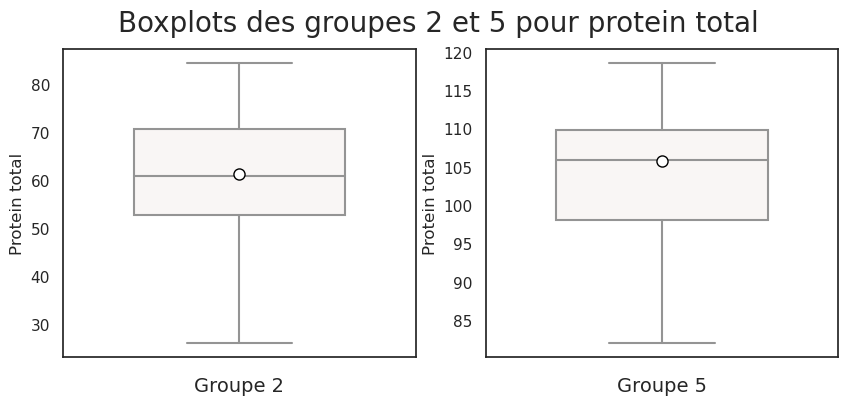

In [204]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Boxplots des groupes 2 et 5 pour protein total', fontsize=20)
sns.boxplot(ax=axes[0], y=cluster2, data=cluster2, width=.6, palette='vlag', showfliers=False,
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'}).set_xlabel('Groupe 2', fontsize=14)
sns.boxplot(ax=axes[1], y=cluster5, data=cluster5, width=.6, palette='vlag', showfliers=False,
            showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':'8'}).set_xlabel('Groupe 5', fontsize=14)
plt.show()

In [205]:
p_value = scipy.stats.bartlett(cluster2, cluster5)[1]
print('p-value =', p_value)
print(f'La p-valeur valant {np.round(p_value, 2)}, on ne rejette donc pas l’égalité des variances au niveau de test 5%.')

p-value = 0.8398298999786726
La p-valeur valant 0.84, on ne rejette donc pas l’égalité des variances au niveau de test 5%.


#### L'égalité des variances n'étant pas rejettée, on peut tester l’égalité des moyennes.

In [206]:
p_value = scipy.stats.ttest_ind(cluster2, cluster5, equal_var=True)[1]
print('p-value =', p_value)

p-value = 4.877989115343742e-22


In [207]:
print(f'L’hypothèse d\'égalité des moyennes est facilement rejetée pour un niveau de test de 5% (p-value = {p_value}).')
print('Les distributions ne suivent donc pas la même loi.')

L’hypothèse d'égalité des moyennes est facilement rejetée pour un niveau de test de 5% (p-value = 4.877989115343742e-22).
Les distributions ne suivent donc pas la même loi.


#### Test de Mann et Whitney pour des échantillons non-appariés (test non-paramétrique, ne dépend pas de la distribution des échantillons)

In [208]:
#Application du test de Mann Witney

p_value = scipy.stats.mannwhitneyu(cluster2, cluster5)[1]
print(f'On peut rejeter l\'égalité de la loi de la variable \'Protein total\' entre les clusters 2 et 5, pour un niveau de test de 5% (p-value = {p_value}).')

On peut rejeter l'égalité de la loi de la variable 'Protein total' entre les clusters 2 et 5, pour un niveau de test de 5% (p-value = 1.3016148880393932e-12).


In [209]:
df[:5]

,Cluster,Protein animal/ Protein total,Protein poultry/ Protein animal,Ratio export poultry,Ratio import poultry,Food total,Protein total,Protein animal,Production poultry,Import poultry,Export poultry,Protein poultry,Var pop,Pib
Area,,,,,,,,,,,,,,
Afghanistan,2,18.55,4.77,0.0,46.30,2270.0,57.62,10.69,29.0,25.0,0.0,0.51,25.42,483.89
Albania,4,53.91,5.78,0.0,42.86,3296.0,112.89,60.86,16.0,12.0,0.0,3.52,-3.99,5254.38
Algeria,3,26.91,8.56,0.0,0.00,3382.0,90.29,24.30,286.0,0.0,0.0,2.08,17.76,4153.96
Angola,1,30.99,24.96,0.0,89.10,2451.0,53.80,16.67,41.0,335.0,0.0,4.16,29.58,3289.64
Antigua and Barbuda,3,63.70,36.80,0.0,100.00,2470.0,80.96,51.57,0.0,7.0,0.0,18.98,11.31,16672.74


### Q–Q plot : Protein total groupe 2 vs loi normale

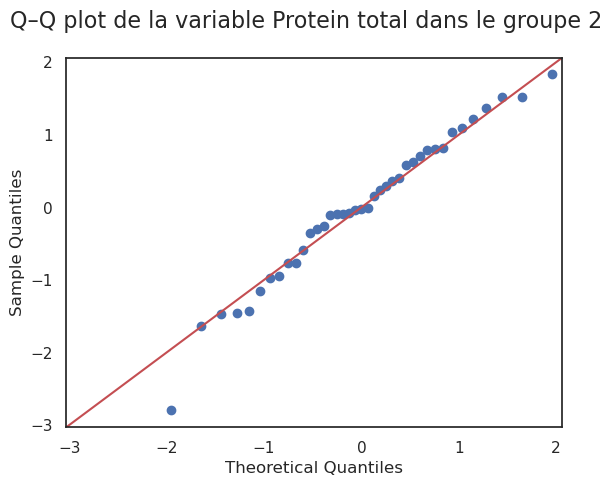

In [210]:
fig = sm.qqplot(cluster2, fit=True, line='45')
fig.suptitle('Q–Q plot de la variable Protein total dans le groupe 2', fontsize=16)
plt.show()

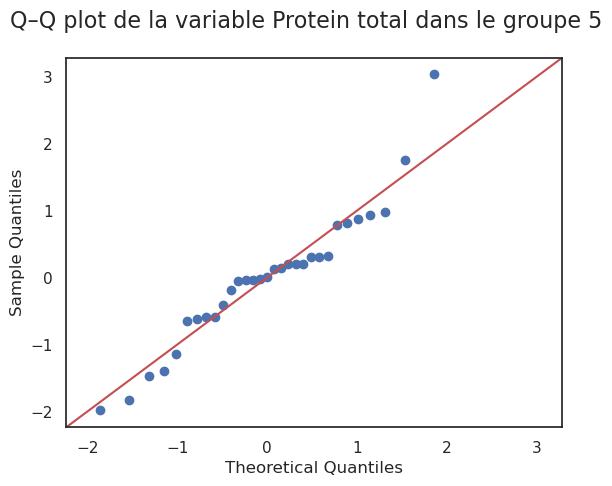

In [211]:
fig = sm.qqplot(cluster5, fit=True, line='45')
fig.suptitle('Q–Q plot de la variable Protein total dans le groupe 5', fontsize=16)
plt.show()

### Two samples Q–Q plot

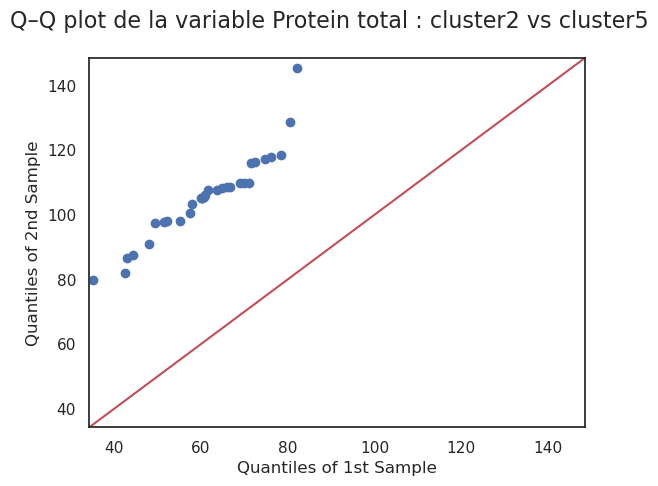

In [212]:
fig = sm.qqplot_2samples(cluster2, cluster5, xlabel=None, ylabel=None, line='45', ax=None)
#fig = sm.qqplot(pd.DataFrame(cluster2), pd.DataFrame(cluster5), line='45')
fig.suptitle('Q–Q plot de la variable Protein total : cluster2 vs cluster5', fontsize=16)
plt.show()

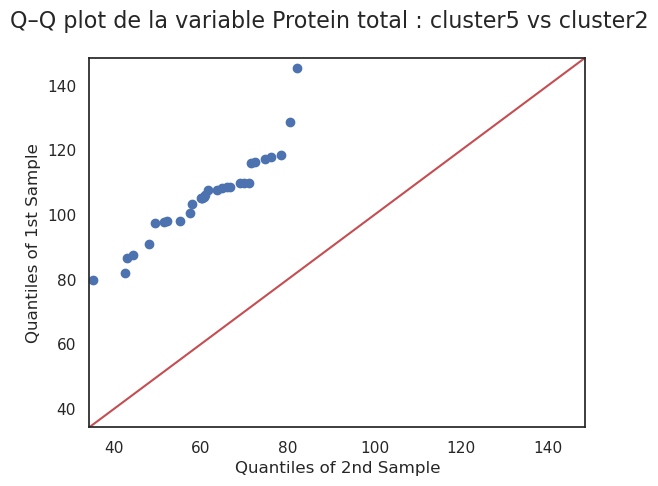

In [213]:
fig = sm.qqplot_2samples(cluster5, cluster2, xlabel=None, ylabel=None, line='45', ax=None)
#fig = sm.qqplot(pd.DataFrame(cluster2), pd.DataFrame(cluster5), line='45')
fig.suptitle('Q–Q plot de la variable Protein total : cluster5 vs cluster2', fontsize=16)
plt.show()